In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Clustering

In [2]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

**1.1	Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots (histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.**

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [6]:
df.shape

(210, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [9]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

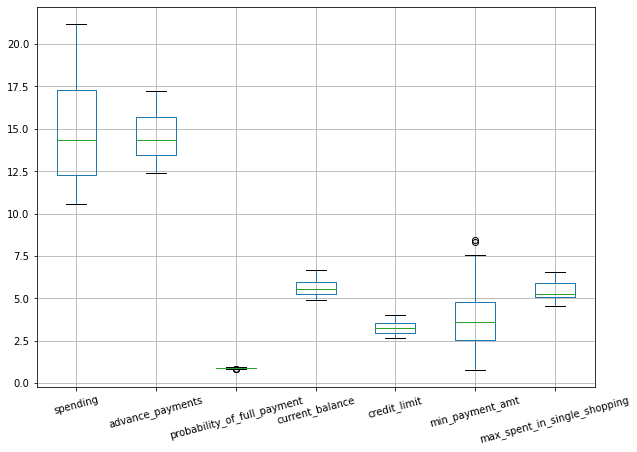

In [10]:
plt.figure(figsize=(10,7))
df.boxplot()
plt.xticks(rotation = 15) 
plt.show()

In [11]:
df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

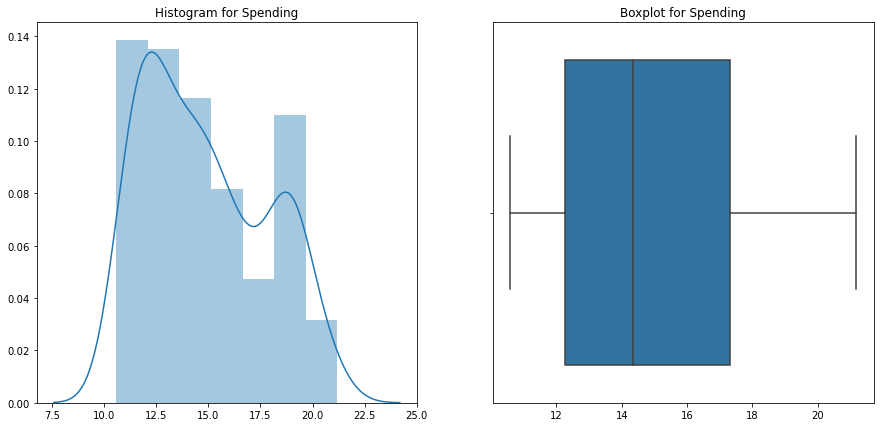

In [12]:
f,ax=plt.subplots(1,2,figsize=(15,7))

sns.distplot(df.spending,kde=True,ax=ax[0])
sns.boxplot(x='spending',data=df,ax=ax[1])
ax[0].set_title('Histogram for Spending')
ax[1].set_title('Boxplot for Spending')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

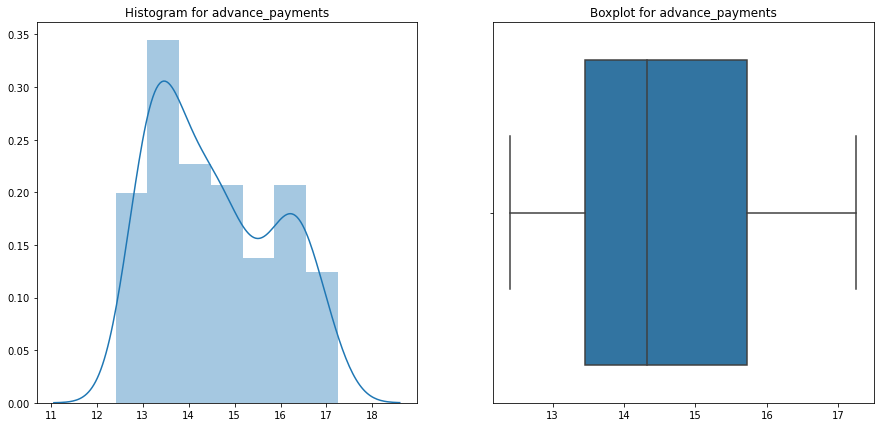

In [13]:
f,ax=plt.subplots(1,2,figsize=(15,7))

sns.distplot(df.advance_payments,ax=ax[0])
sns.boxplot(x='advance_payments',data=df,ax=ax[1])
ax[0].set_title('Histogram for advance_payments')
ax[1].set_title('Boxplot for advance_payments')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

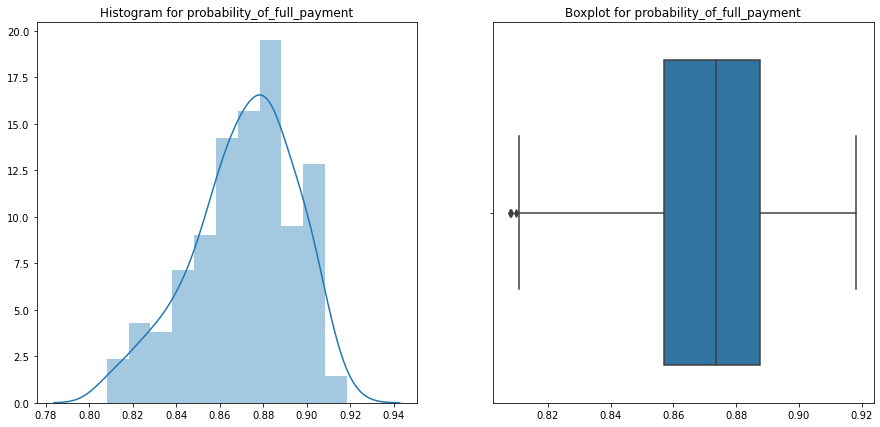

In [14]:
f,ax=plt.subplots(1,2,figsize=(15,7))

sns.distplot(df.probability_of_full_payment,ax=ax[0])
sns.boxplot(x='probability_of_full_payment',data=df,ax=ax[1])
ax[0].set_title('Histogram for probability_of_full_payment')
ax[1].set_title('Boxplot for probability_of_full_payment')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

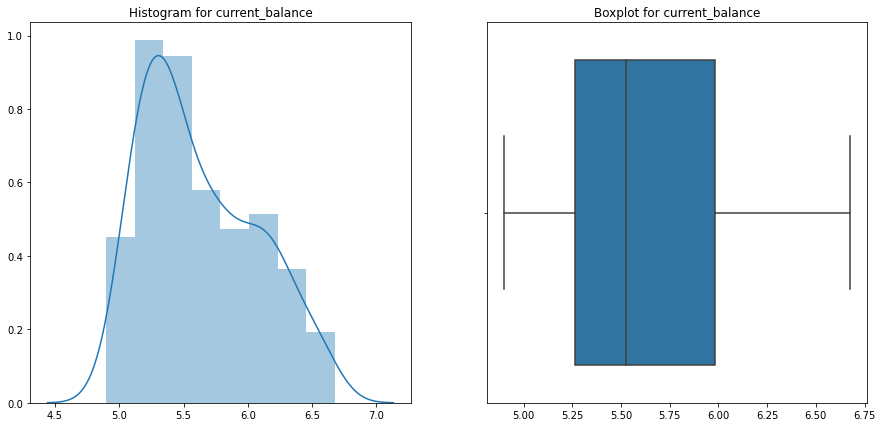

In [15]:
f,ax=plt.subplots(1,2,figsize=(15,7))

sns.distplot(df.current_balance,ax=ax[0])
sns.boxplot(x='current_balance',data=df,ax=ax[1])
ax[0].set_title('Histogram for current_balance')
ax[1].set_title('Boxplot for current_balance')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

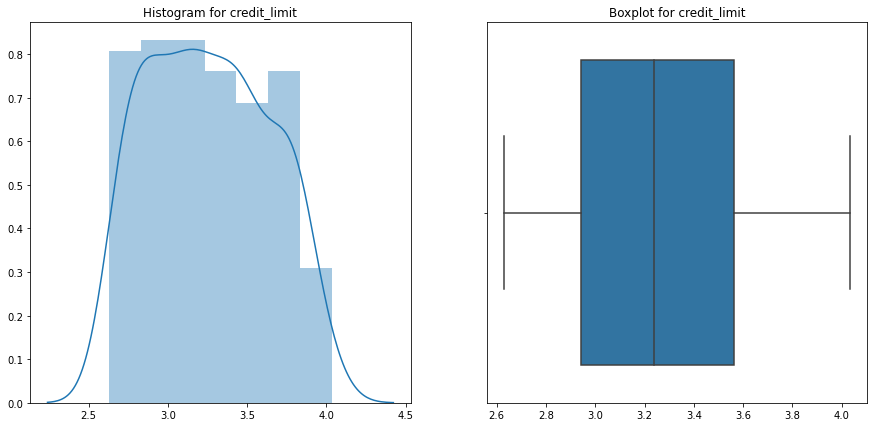

In [16]:
f,ax=plt.subplots(1,2,figsize=(15,7))

sns.distplot(df.credit_limit,ax=ax[0])
sns.boxplot(x='credit_limit',data=df,ax=ax[1])
ax[0].set_title('Histogram for credit_limit')
ax[1].set_title('Boxplot for credit_limit')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

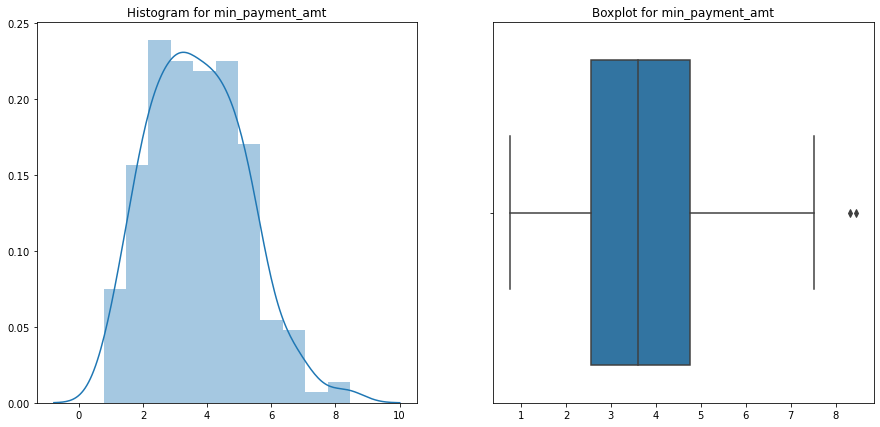

In [17]:
f,ax=plt.subplots(1,2,figsize=(15,7))

sns.distplot(df.min_payment_amt,ax=ax[0])
sns.boxplot(x='min_payment_amt',data=df,ax=ax[1])
ax[0].set_title('Histogram for min_payment_amt')
ax[1].set_title('Boxplot for min_payment_amt')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

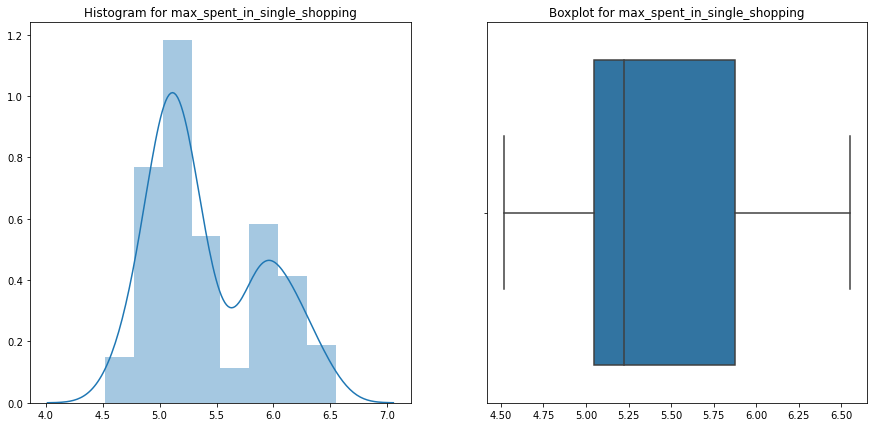

In [18]:
f,ax=plt.subplots(1,2,figsize=(15,7))

sns.distplot(df.max_spent_in_single_shopping,ax=ax[0])
sns.boxplot(x='max_spent_in_single_shopping',data=df,ax=ax[1])
ax[0].set_title('Histogram for max_spent_in_single_shopping')
ax[1].set_title('Boxplot for max_spent_in_single_shopping')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

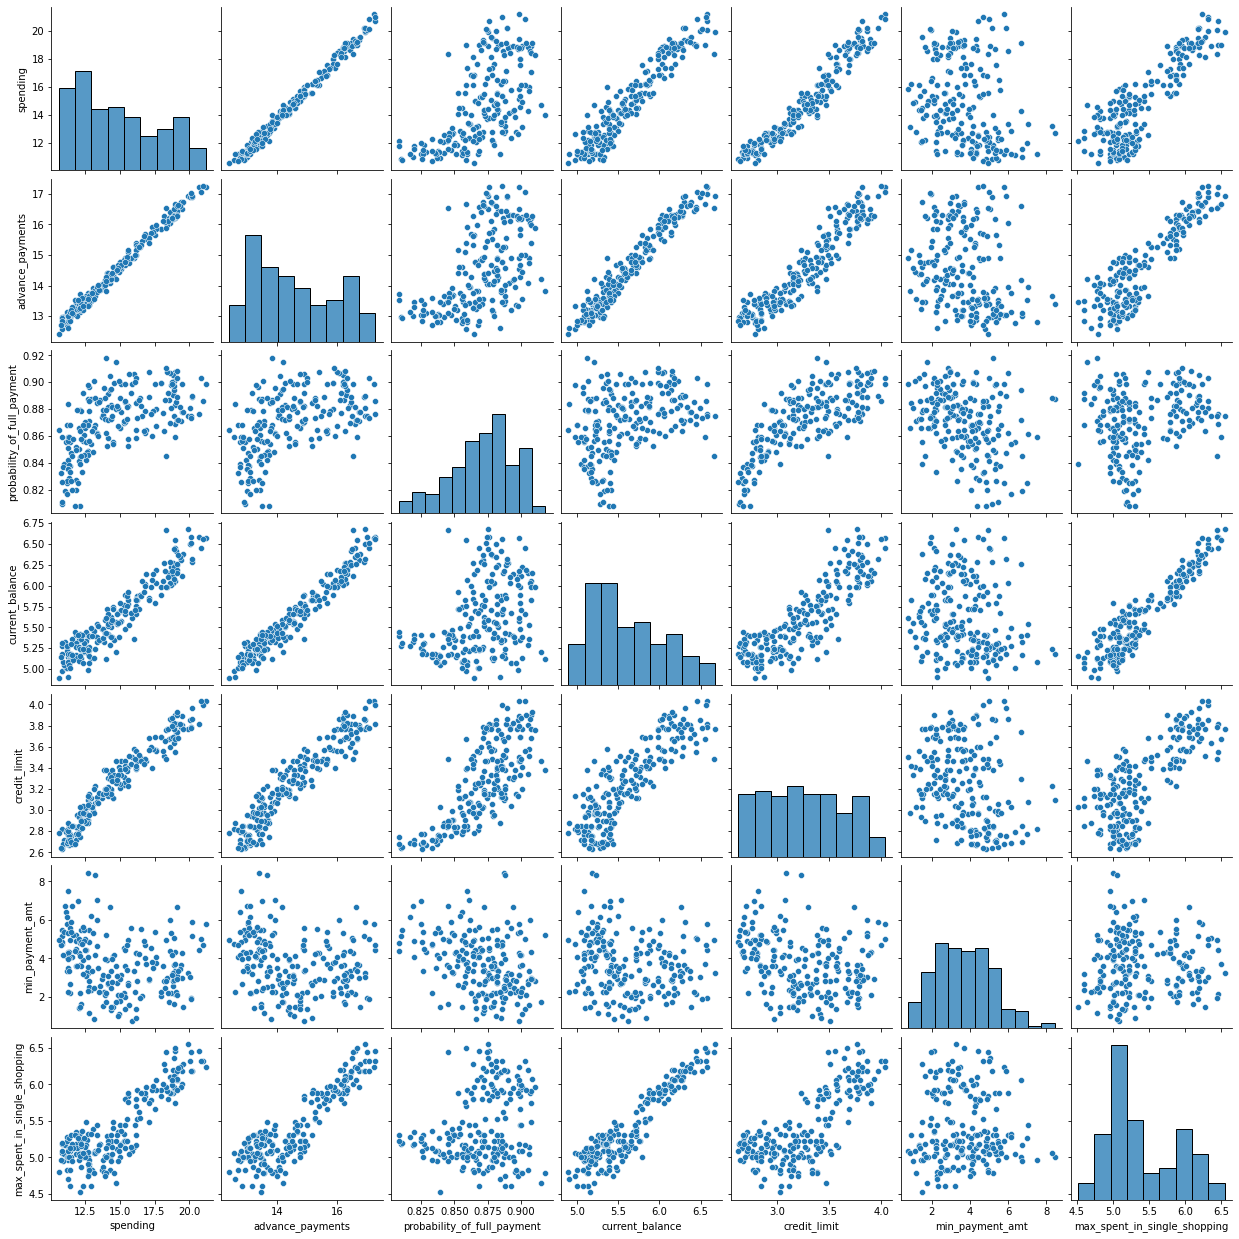

In [19]:
sns.pairplot(df);

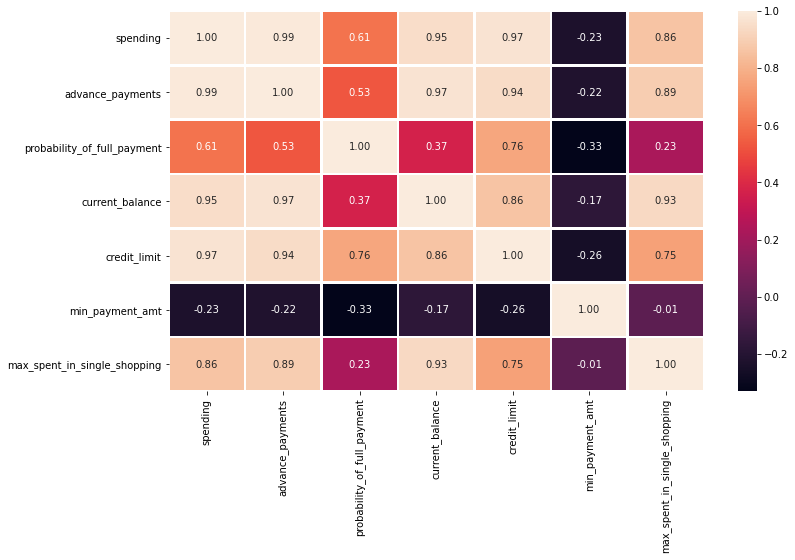

In [20]:
corr = df.corr()

f,ax = plt.subplots(figsize=(12,7))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [21]:
for i in df.columns:
    print("Skewness for", i,"is: ",round(df[i].skew(),2))


Skewness for spending is:  0.4
Skewness for advance_payments is:  0.39
Skewness for probability_of_full_payment is:  -0.54
Skewness for current_balance is:  0.53
Skewness for credit_limit is:  0.13
Skewness for min_payment_amt is:  0.4
Skewness for max_spent_in_single_shopping is:  0.56


**1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.**

In [22]:
from scipy.stats import zscore 
scaled_df = df.apply(zscore)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [23]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.243978e-15,1.002389,-2.668236,-0.598079,0.103993,0.711677,2.006586
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,5.302637e-16,1.002389,-1.956769,-0.759148,-0.067469,0.712379,3.170590
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


**1.3	Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.**

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

# WARD method

In [25]:
wardlink = linkage(scaled_df, method = 'ward')

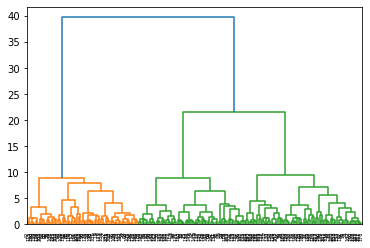

In [26]:
dend = dendrogram(wardlink)

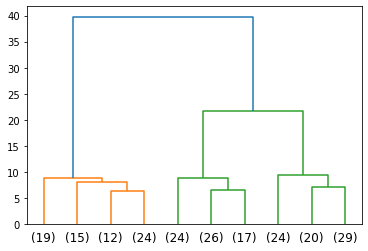

In [27]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,# we are looking at the last 25 merges
                 )

In [28]:
from scipy.cluster.hierarchy import fcluster

In [29]:
# Method 1
clusters1 = fcluster(wardlink, 3, criterion='maxclust')
clusters1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [30]:
# Method 2
clusters2 = fcluster(wardlink, 20, criterion='distance')
clusters2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [31]:
np.array_equal(clusters1,clusters2)

True

In [32]:
df['clusters'] = clusters1

In [33]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [34]:
df.clusters.value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

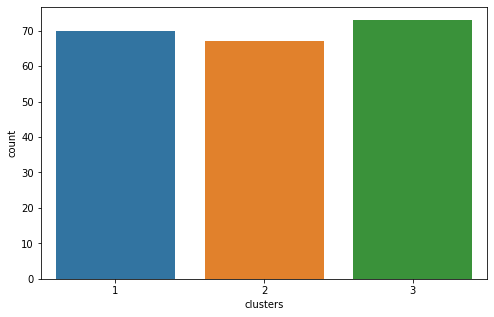

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df.clusters);

In [36]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


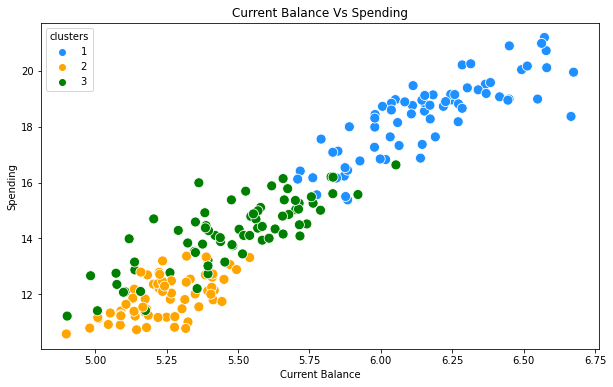

In [37]:
# #Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'current_balance',y ='spending',hue='clusters',
                 palette=['dodgerblue','orange','green'], legend='full',data = df,s = 100 )
plt.xlabel('Current Balance')
plt.ylabel('Spending') 
plt.title('Current Balance Vs Spending')
plt.show()
# df.head()

# Average Method

In [55]:
avglink = linkage(scaled_df, method = 'average')

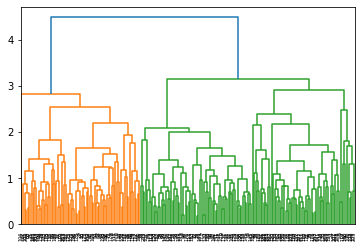

In [56]:
dend = dendrogram(avglink)

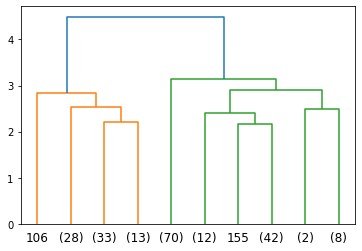

In [57]:
dend = dendrogram(avglink,
                 truncate_mode='lastp',
                 p = 10,# we are looking at the last 25 merges
                 )

In [58]:
# Method 1
clusters3 = fcluster(avglink, 3, criterion='maxclust')
clusters3

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [59]:
# Method 2
clusters4 = fcluster(avglink, 3, criterion='distance')
clusters4

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [60]:
np.array_equal(clusters1,clusters2)

True

In [61]:
df['clusters'] = clusters3

In [62]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [63]:
df.clusters.value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [64]:
aggdata=df.groupby('clusters').mean()
aggdata['Freq']=df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846766,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.768418,5.055569,65


In [69]:
df.to_csv('wH_Cluster.csv')

**1.4	Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.**

In [38]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [39]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [40]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [41]:
k_means.inertia_

659.1717544870411

In [42]:
wss =[] 

In [43]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [44]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 327.9608240079031,
 290.5900305968219,
 264.83153087478144,
 240.6837259501598,
 220.85285825594738,
 206.3829103601579]

In [45]:
a=[1,2,3,4,5,6,7,8,9,10]

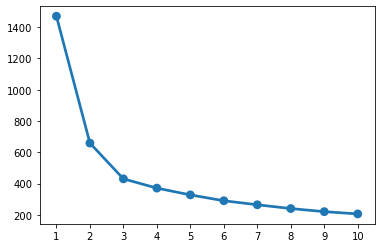

In [46]:
sns.pointplot(a, wss);

In [47]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [48]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.4007270552751298

In [81]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
# labels = k_means.labels_

In [82]:
# silhouette_score(scaled_df,labels,random_state=1)

0.32757426605518075

**drop clusters column**

In [49]:
df=df.drop(['clusters'],axis=1)

In [50]:
df["Clus_kmeans3"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [51]:
df.Clus_kmeans3.value_counts().sort_index()

0    72
1    67
2    71
Name: Clus_kmeans3, dtype: int64

In [52]:
clust_profile=df.groupby('Clus_kmeans3').mean()
clust_profile['Freq']=df.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clus_kmeans3,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


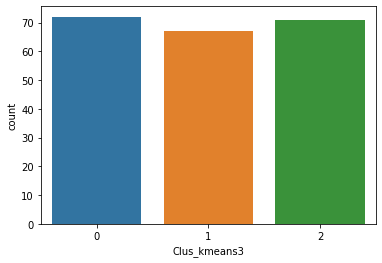

In [98]:
sns.countplot(df.Clus_kmeans3);

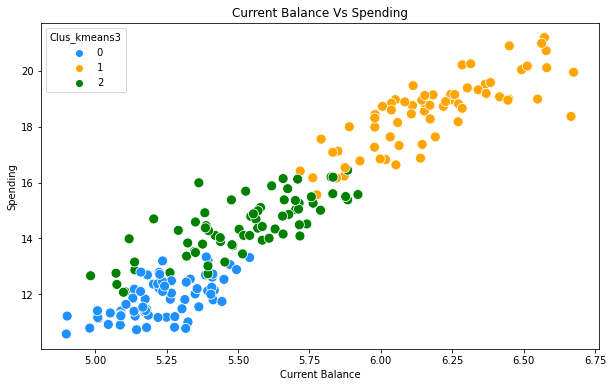

In [53]:
# #Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'current_balance',y ='spending',hue='Clus_kmeans3',
                 palette=['dodgerblue','orange','green'], legend='full',data = df  ,s = 100 )
plt.xlabel('Current Balance')
plt.ylabel('Spending') 
plt.title('Current Balance Vs Spending')
plt.show()
# df.head()

In [54]:
sil_width = silhouette_samples(scaled_df,labels)

In [55]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans3,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.362276


In [56]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678376

In [95]:
df.to_csv('km.csv')

# Problem 2: CART-RF-ANN

In [60]:
t_ins_df=pd.read_csv('insurance_part2_data.csv')

In [3]:
t_ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [103]:
t_ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [105]:
t_ins_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
dups = t_ins_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


In [61]:
t_ins_df.drop_duplicates(inplace=True)

In [110]:
dups = t_ins_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [111]:
t_ins_df.shape

(2861, 10)

In [112]:
t_ins_df[t_ins_df['Duration']==-1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [113]:
t_ins_df['Duration'].mode().values[0]

10

In [62]:
t_ins_df['Duration']=t_ins_df['Duration'].replace(-1,10.0)

In [115]:
t_ins_df[t_ins_df['Duration']==-1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [116]:
t_ins_df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

# Building a Decision Tree Classifier

In [65]:
cart_df=t_ins_df.copy()
cart_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


**2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.**

In [118]:
cart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.9+ KB


In [119]:
cart_df.shape

(2861, 10)

In [120]:
cart_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2861.0,NaN,NaN,NaN,38.204124,10.678106,8.0,31.0,36.0,43.0,84.0
Agency_Code,2861,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2861,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2861,2,No,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2861.0,NaN,NaN,NaN,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Channel,2861,2,Online,2815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2861.0,NaN,NaN,NaN,72.124082,135.975287,0.0,12.0,28.0,66.0,4580.0
Sales,2861.0,NaN,NaN,NaN,61.757878,71.39974,0.0,20.0,33.5,69.3,539.0
Product Name,2861,5,Customised Plan,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2861,3,ASIA,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
# cart_df[cart_df.Age>42]['Age'].count()
cart_df[(cart_df.Age>42) | (cart_df.Age<32)]['Age'].count()

1451

In [122]:
cart_df.shape

(2861, 10)

In [123]:
def prop_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [128]:
lrage,urage=prop_outlier(cart_df['Age'])
print((cart_df[(cart_df.Age>urage) | (cart_df.Age<lrage)]['Age'].count()/cart_df.Age.count())*100)

lrage,urage=prop_outlier(cart_df['Commision'])
print((cart_df[(cart_df.Commision>urage) | (cart_df.Commision<lrage)]['Age'].count()/cart_df.Commision.count())*100)

lrage,urage=prop_outlier(cart_df['Duration'])
print((cart_df[(cart_df.Duration>urage) | (cart_df.Duration<lrage)]['Age'].count()/cart_df.Duration.count())*100)

lrage,urage=prop_outlier(cart_df['Sales'])
print((cart_df[(cart_df.Sales>urage) | (cart_df.Sales<lrage)]['Age'].count()/cart_df.Sales.count())*100)



4.543865781195387
12.373296050332051
12.652918559944077
12.093673540720028


In [129]:
cart_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [22]:
# cart_df[dups].to_csv('duplicate.csv')

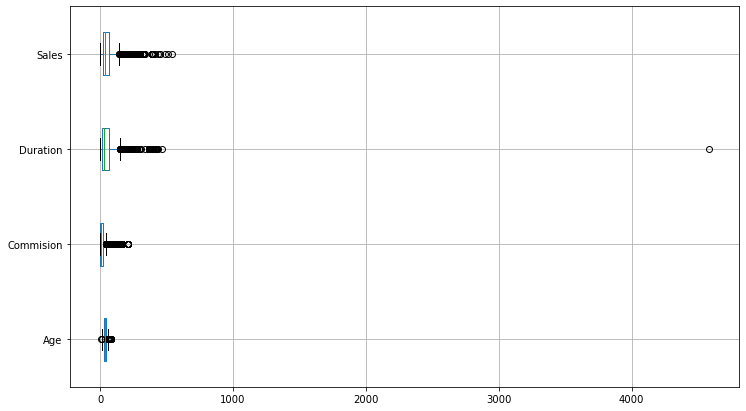

In [130]:
# construct box plot for continuous variables
plt.figure(figsize=(12,7))
cart_df[['Age', 'Commision', 'Duration', 'Sales']].boxplot(vert=0)
plt.show()

In [131]:
cart_df[['Age', 'Commision', 'Duration', 'Sales']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.124082,135.975287,0.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


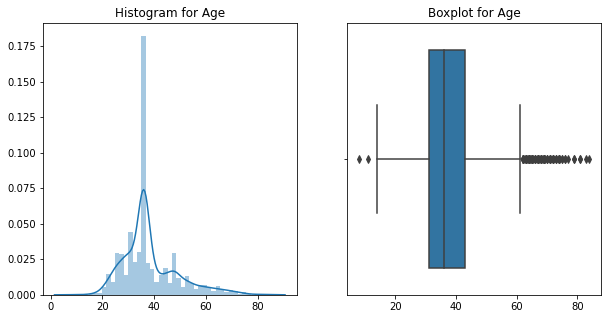

In [135]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(cart_df.Age,ax=ax[0])
sns.boxplot(x='Age',data=cart_df,ax=ax[1])
ax[0].set_title('Histogram for Age')
ax[1].set_title('Boxplot for Age')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

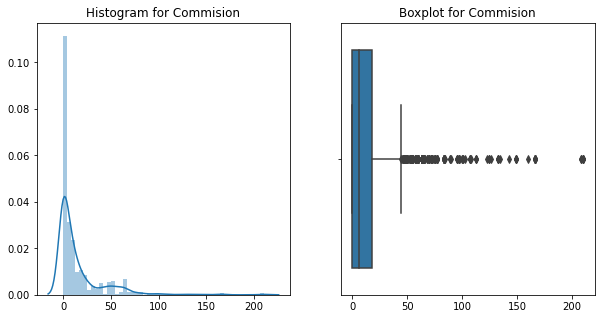

In [136]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(cart_df.Commision,ax=ax[0])
sns.boxplot(x='Commision',data=cart_df,ax=ax[1])
ax[0].set_title('Histogram for Commision')
ax[1].set_title('Boxplot for Commision')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

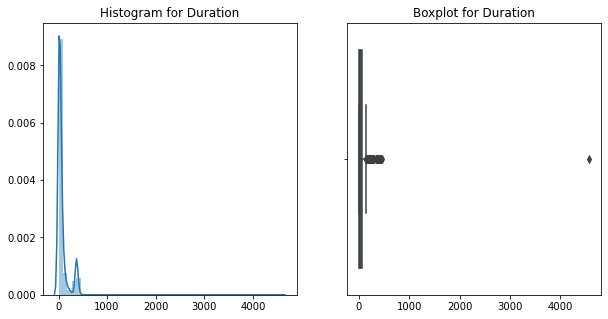

In [137]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(cart_df.Duration,ax=ax[0])
sns.boxplot(x='Duration',data=cart_df,ax=ax[1])
ax[0].set_title('Histogram for Duration')
ax[1].set_title('Boxplot for Duration')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

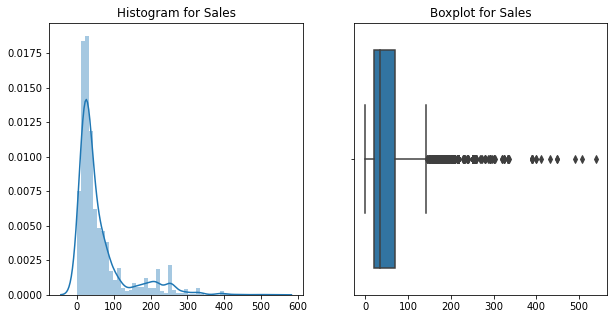

In [138]:
f,ax=plt.subplots(1,2,figsize=(10,5))

sns.distplot(cart_df.Sales,ax=ax[0])
sns.boxplot(x='Sales',data=cart_df,ax=ax[1])
ax[0].set_title('Histogram for Sales')
ax[1].set_title('Boxplot for Sales')
ax[0].set_xlabel("");
ax[0].set_ylabel("");
ax[1].set_xlabel("");
ax[1].set_ylabel("");
plt.show()

In [139]:
for i in ('Age', 'Commision', 'Duration', 'Sales'):
    print("Skewness for", i,"is: ",cart_df[i].skew())

Skewness for Age is:  1.1031446044352335
Skewness for Commision is:  3.1047406576922842
Skewness for Duration is:  13.786614016519017
Skewness for Sales is:  2.3446426921667585


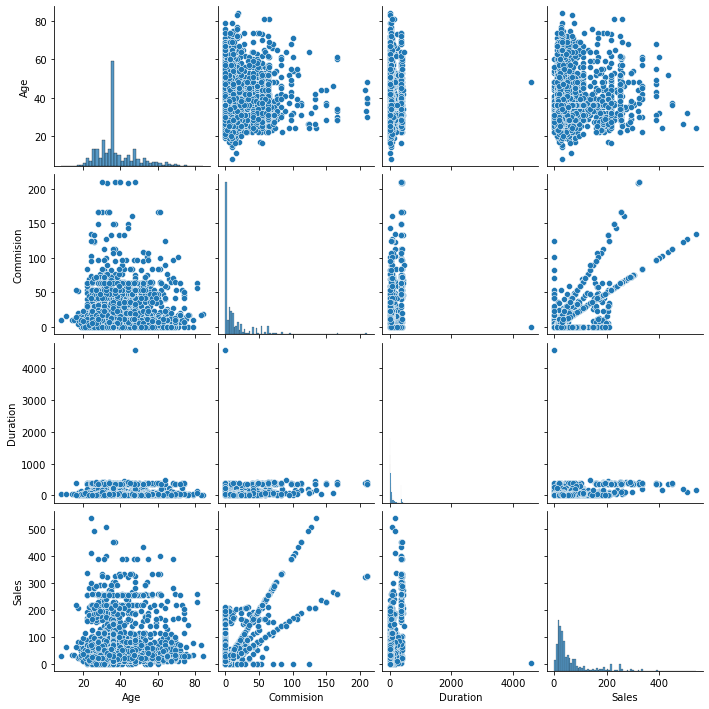

In [140]:
sns.pairplot(cart_df[['Age', 'Commision', 'Duration', 'Sales']]);

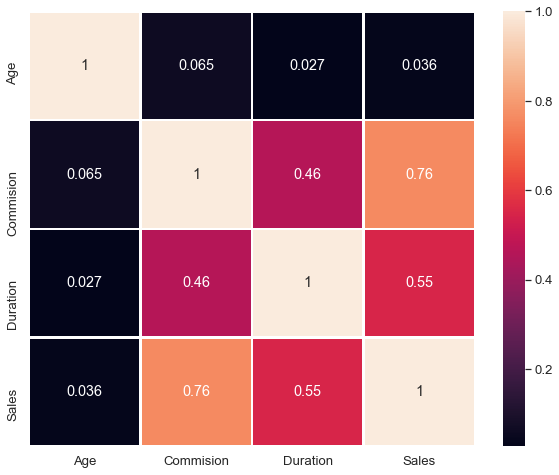

In [141]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(cart_df[['Age', 'Commision', 'Duration', 'Sales']].corr(),linewidths=1.5, annot=True);


In [32]:
cart_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

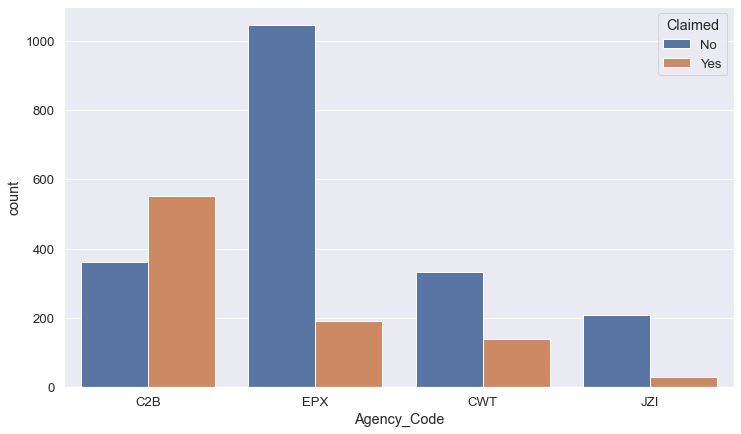

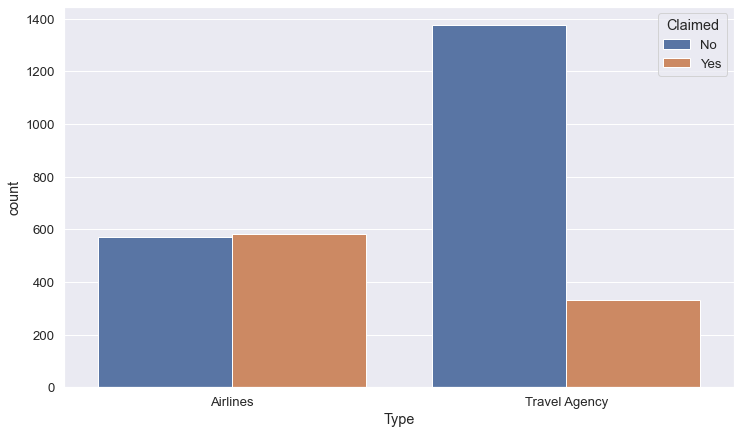

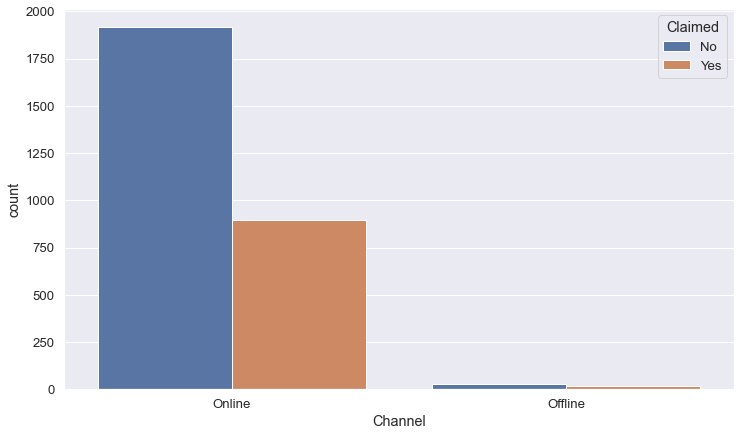

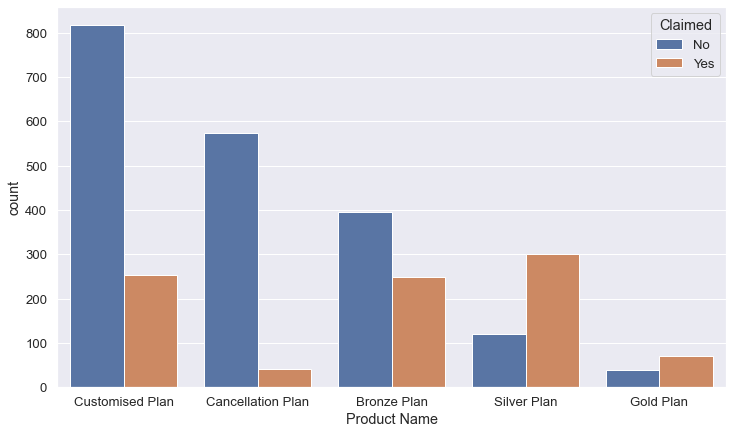

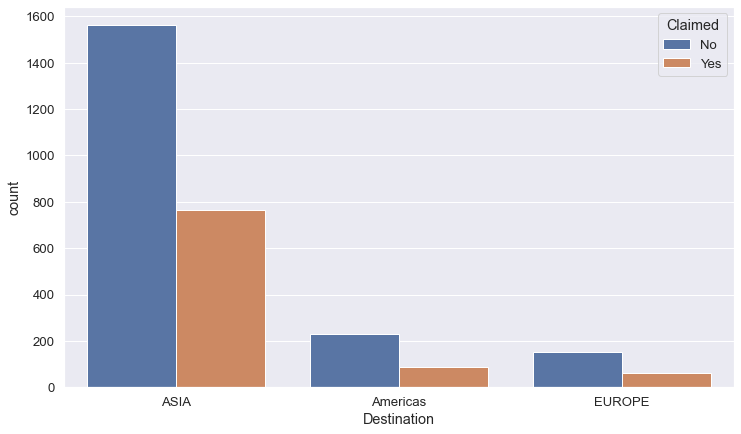

In [142]:
for i in ('Agency_Code','Type','Channel','Product Name', 'Destination'):
    plt.figure(figsize=(12,7))
    sns.countplot(cart_df[i],hue=cart_df.Claimed)  
    plt.show()

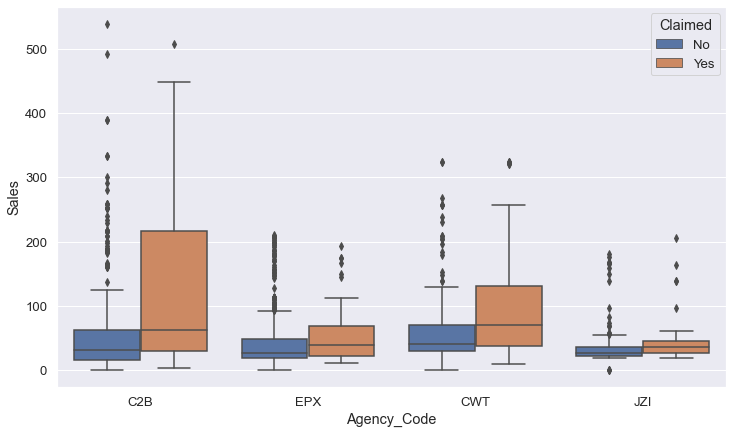

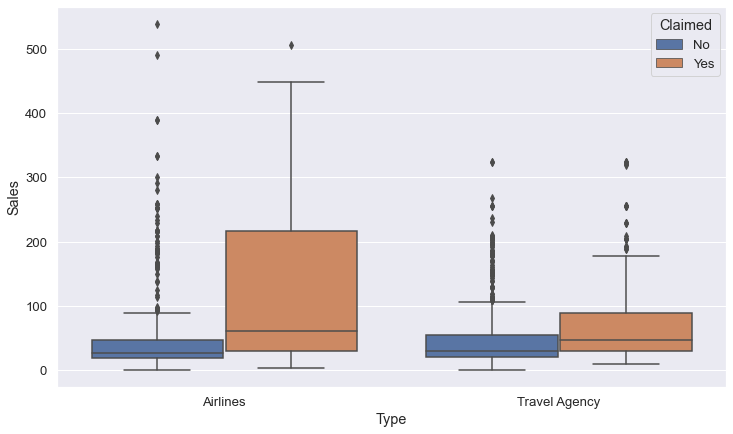

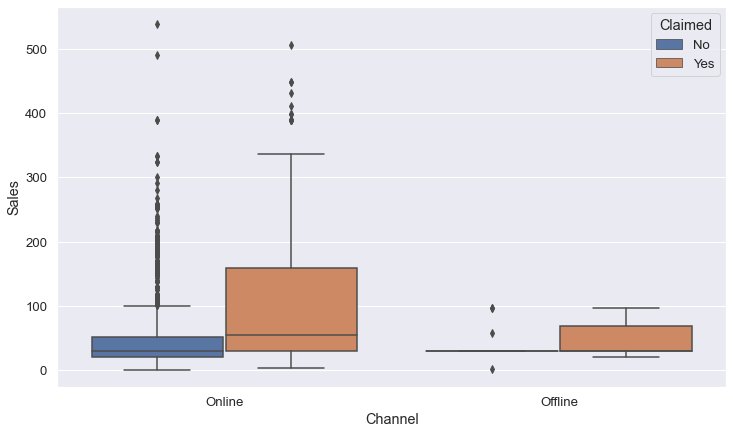

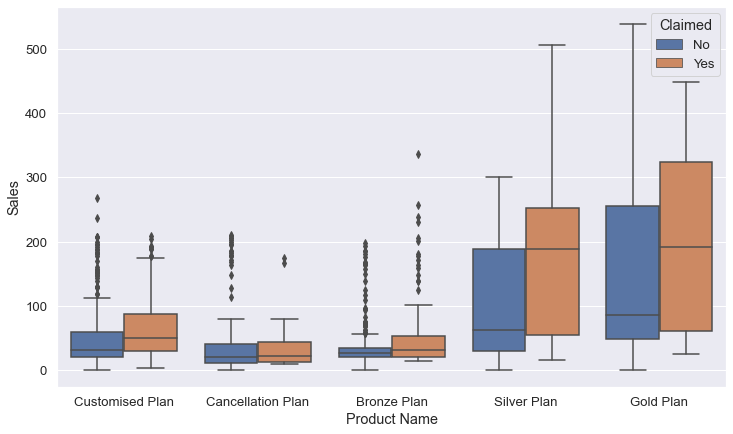

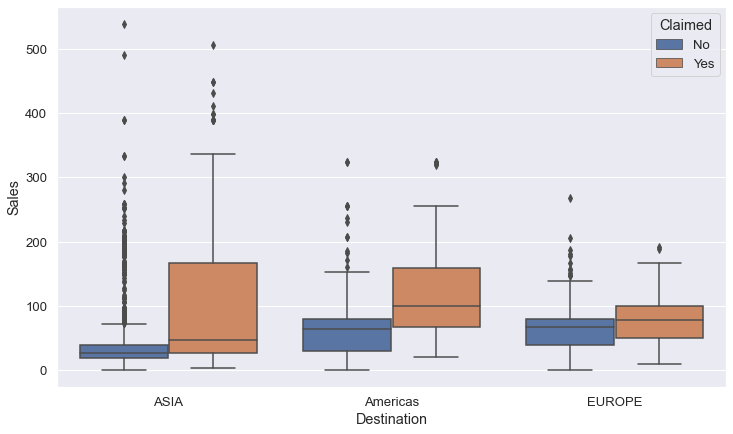

In [146]:
for i in ('Agency_Code','Type','Channel','Product Name', 'Destination'):
    plt.figure(figsize=(12,7))
    sns.boxplot(x=cart_df[i],y=cart_df.Sales,hue=cart_df.Claimed)  
    plt.show()

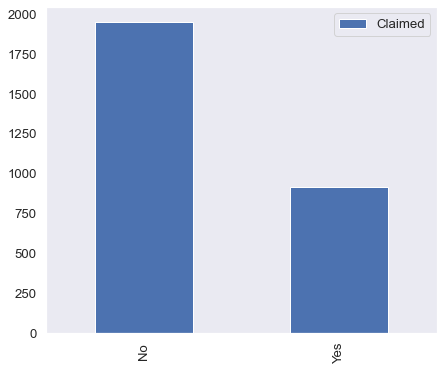

In [143]:
plt.figure(figsize=(7,6))
cart_df['Claimed'].value_counts().plot(kind='bar')
plt.legend()
plt.grid()
plt.show()


In [147]:
cart_df['Claimed'].value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [148]:
cart_df['Claimed'].value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

In [149]:
cart_df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [150]:
print('Agency Code\n',cart_df.Agency_Code.value_counts())
print('------------------')
print('Type\n',cart_df.Type.value_counts())
print('------------------')
print('Claimed\n',cart_df.Claimed.value_counts())
print('------------------')
print('Channel\n',cart_df.Channel.value_counts())
print('------------------')
print('Product Name\n',cart_df['Product Name'].value_counts())
print('------------------')
print('Destination\n',cart_df.Destination.value_counts())
print('------------------')

Agency Code
 EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64
------------------
Type
 Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64
------------------
Claimed
 No     1947
Yes     914
Name: Claimed, dtype: int64
------------------
Channel
 Online     2815
Offline      46
Name: Channel, dtype: int64
------------------
Product Name
 Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64
------------------
Destination
 ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64
------------------


In [66]:
for feature in cart_df.columns: 
    if cart_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(cart_df[feature].unique()))
        print(pd.Categorical(cart_df[feature].unique()).codes)
        cart_df[feature] = pd.Categorical(cart_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [152]:
print('Agency Code\n',cart_df.Agency_Code.value_counts())
print('------------------')
print('Type\n',cart_df.Type.value_counts())
print('------------------')
print('Claimed\n',cart_df.Claimed.value_counts())
print('------------------')
print('Channel\n',cart_df.Channel.value_counts())
print('------------------')
print('Product Name\n',cart_df['Product Name'].value_counts())
print('------------------')
print('Destination\n',cart_df.Destination.value_counts())
print('------------------')

Agency Code
 2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64
------------------
Type
 1    1709
0    1152
Name: Type, dtype: int64
------------------
Claimed
 0    1947
1     914
Name: Claimed, dtype: int64
------------------
Channel
 1    2815
0      46
Name: Channel, dtype: int64
------------------
Product Name
 2    1071
0     645
1     615
4     421
3     109
Name: Product Name, dtype: int64
------------------
Destination
 0    2327
1     319
2     215
Name: Destination, dtype: int64
------------------


In [153]:
cart_df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [154]:
cart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


**2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory.**

In [67]:
X = cart_df.drop("Claimed", axis=1)
y = cart_df.pop("Claimed")

In [156]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [68]:
from sklearn.model_selection import train_test_split
cX_train, cX_test, ctrain_labels, ctest_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [158]:
print('X_train',cX_train.shape)
print('X_test',cX_test.shape)
print('train_labels',ctrain_labels.shape)
print('test_labels',ctest_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [159]:
ctrain_labels.value_counts()

0    1359
1     643
Name: Claimed, dtype: int64

In [160]:
ctrain_labels.value_counts(normalize=True)

0    0.678821
1    0.321179
Name: Claimed, dtype: float64

In [161]:
ctest_labels.value_counts()

0    588
1    271
Name: Claimed, dtype: int64

In [162]:
ctest_labels.value_counts(normalize=True)

0    0.684517
1    0.315483
Name: Claimed, dtype: float64

### Building a Decision Tree Classifier


In [69]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [70]:
# Fit the model
dt_model.fit(cX_train, ctrain_labels)

DecisionTreeClassifier(random_state=1)

In [165]:
from sklearn import tree

train_char_label = ['No', 'Yes']
insure_Tree_File = open('insure_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=insure_Tree_File, 
                                feature_names = list(cX_train), 
                                class_names = list(train_char_label))

insure_Tree_File.close()


In [166]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = cX_train.columns).sort_values('Imp',ascending=False))


                   Imp
Duration      0.280493
Sales         0.229321
Age           0.187876
Agency_Code   0.168711
Commision     0.072804
Product Name  0.028635
Destination   0.028253
Channel       0.003908
Type          0.000000


In [167]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [4,5],
    'min_samples_leaf': [15,20,30], 
    'min_samples_split': [100,150,200],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [168]:
grid_search.fit(cX_train, ctrain_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5],
                         'min_samples_leaf': [15, 20, 30],
                         'min_samples_split': [100, 150, 200]})

In [171]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 30, 'min_samples_split': 200}


In [259]:
# ctbest_grid = grid_search.best_estimator_
# ctbest_grid

In [71]:
ct_best_grid = DecisionTreeClassifier(criterion = 'gini', max_depth = 4,min_samples_leaf=20,min_samples_split=300,random_state=1)

In [72]:
ct_best_grid.fit(cX_train, ctrain_labels)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=300,
                       random_state=1)

In [174]:
# ins_tree_regularized = open('ins_tree_regularized.dot','w')
# dot_data = tree.export_graphviz(ctbest_grid, out_file= ins_tree_regularized , feature_names = list(cX_train), class_names = list(train_char_label))

# ins_tree_regularized.close()
# dot_data

In [175]:
print (pd.DataFrame(ct_best_grid.feature_importances_, columns = ["Imp"], index = cX_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.620617
Sales         0.315209
Product Name  0.048947
Commision     0.015226
Age           0.000000
Type          0.000000
Channel       0.000000
Duration      0.000000
Destination   0.000000


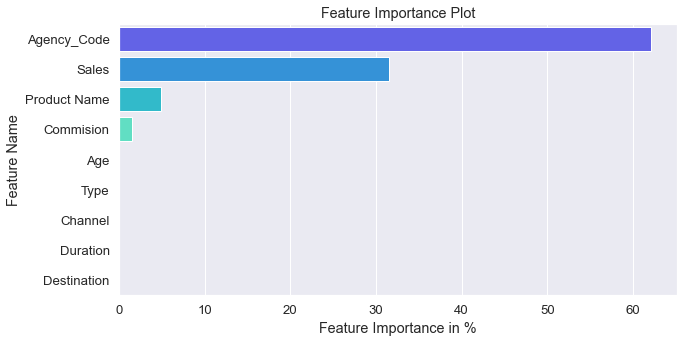

In [176]:
x=pd.DataFrame(ct_best_grid.feature_importances_*100,index=cX_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [73]:
ct_ytrain_predict = ct_best_grid.predict(cX_train)
ct_ytest_predict = ct_best_grid.predict(cX_test)

In [178]:
print('ytrain_predict',ct_ytrain_predict.shape)
print('ytest_predict',ct_ytest_predict.shape)

ytrain_predict (2002,)
ytest_predict (859,)


In [179]:
ct_ytest_predict_prob=ct_best_grid.predict_proba(cX_test)
pd.DataFrame(ct_ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.932673,0.067327
2,0.232975,0.767025
3,0.714744,0.285256
4,0.714744,0.285256


# AUC and ROC for the training data

AUC: 0.802


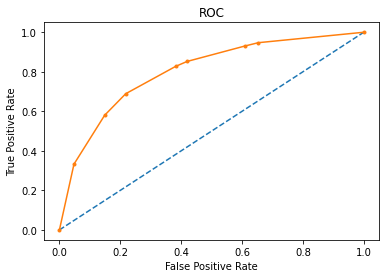

In [74]:
# predict probabilities
ct_probs = ct_best_grid.predict_proba(cX_train)
# keep probabilities for the positive outcome only
ct_probs = ct_probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(ctrain_labels, ct_probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ctrain_labels, ct_probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the test data

AUC: 0.802


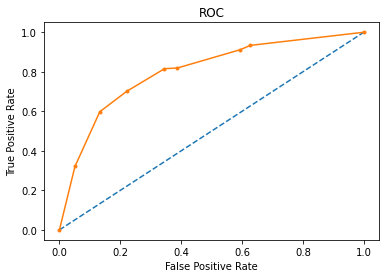

In [75]:
# predict probabilities
ct_probs = ct_best_grid.predict_proba(cX_test)
# keep probabilities for the positive outcome only
ct_probs = ct_probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(ctest_labels, ct_probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ctest_labels, ct_probs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Confusion Matrix for train data

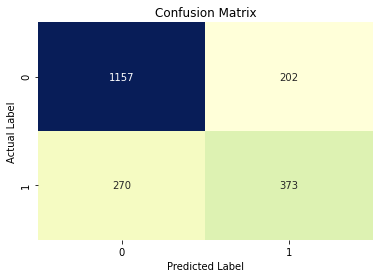

In [76]:
confusion_matrix(ctrain_labels,ct_ytrain_predict)
sns.heatmap(confusion_matrix(ctrain_labels,ct_ytrain_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [77]:
#Train Data Accuracy
cart_train_acc=ct_best_grid.score(cX_train,ctrain_labels) 
cart_train_acc

0.7642357642357642

In [78]:
# previous run
print(classification_report(ctrain_labels, ct_ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [79]:
cart_metrics=classification_report(ctrain_labels, ct_ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.65
cart_train_recall  0.58
cart_train_f1  0.61


# Confusion Matrix for test data

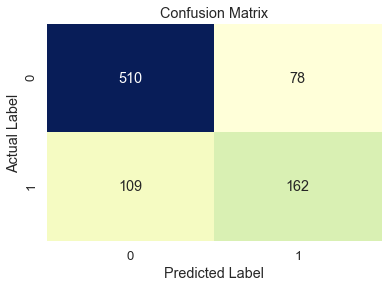

In [186]:
confusion_matrix(ctest_labels,ct_ytest_predict)
sns.heatmap(confusion_matrix(ctest_labels,ct_ytest_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [80]:
#Test Data Accuracy
cart_test_acc=ct_best_grid.score(cX_test,ctest_labels)
cart_test_acc

0.7823050058207218

In [188]:
print(classification_report(ctest_labels, ct_ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [81]:
cart_metrics=classification_report(ctest_labels, ct_ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.68
cart_test_recall  0.6
cart_test_f1  0.63


In [82]:
threshold=0.3
cpredicted = (ct_best_grid.predict_proba(cX_test)[:,1]>=threshold).astype('int')

In [83]:
cart_test_auc_threshold = roc_auc_score(ctest_labels, cpredicted)
print('AUC: %.3f' % cart_test_auc_threshold)

AUC: 0.740


In [84]:
print(classification_report(ctest_labels, cpredicted))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       588
           1       0.59      0.70      0.64       271

    accuracy                           0.75       859
   macro avg       0.72      0.74      0.73       859
weighted avg       0.77      0.75      0.76       859



In [85]:
cart_test_acc_threshold=ct_best_grid.score(cX_test,cpredicted)
cart_test_acc_threshold

0.9068684516880093

In [86]:
cart_metrics=classification_report(ctest_labels, cpredicted,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision_threshold=round(df.loc["1"][0],2)
cart_test_recall_threshold=round(df.loc["1"][1],2)
cart_test_f1_threshold=round(df.loc["1"][2],2)
print ('cart_test_precision_threshold',cart_test_precision_threshold)
print ('cart_test_recall_threshold ',cart_test_recall_threshold)
print ('cart_test_f1_threshold ',cart_test_f1_threshold)

cart_test_precision_threshold 0.59
cart_test_recall_threshold  0.7
cart_test_f1_threshold  0.64


# Cart Conclusion

<b>Train Data:</b>  
    AUC: 80%        
    Accuracy: 76%             
    Precision: 65%<br>
    Recall: 58%<br>
    f1-Score: 61%     
            
<b>Test Data:</b>      
    AUC: 80%      
    Accuracy: 78%         
    Precision: 68%<br>
    Recall: 60%<br>
    f1-Score: 63%<br>   
  

# Building a Random Forest Classifier

In [87]:
r_df=t_ins_df.copy()
r_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [289]:
# dups = r_df.duplicated()
# print('Number of duplicate rows = %d' % (dups.sum()))

In [290]:
# r_df.drop_duplicates(inplace=True)

In [291]:
# dups = r_df.duplicated()
# print('Number of duplicate rows = %d' % (dups.sum()))

In [197]:
r_df.shape

(2861, 10)

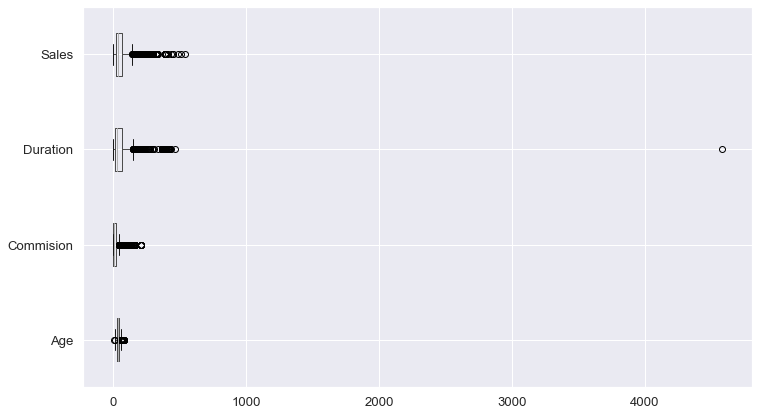

In [196]:
# construct box plot for continuous variables
plt.figure(figsize=(12,7))
r_df[['Age', 'Commision', 'Duration', 'Sales']].boxplot(vert=0)
plt.show()

**Treating Outliers**

In [88]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [89]:
lrage,urage=treat_outlier(r_df['Age'])
print((r_df[(r_df.Age>urage) | (r_df.Age<lrage)]['Age'].count()/r_df.Age.count())*100)

lrage,urage=treat_outlier(r_df['Commision'])
print((r_df[(r_df.Commision>urage) | (r_df.Commision<lrage)]['Age'].count()/r_df.Commision.count())*100)

lrage,urage=treat_outlier(r_df['Duration'])
print((r_df[(r_df.Duration>urage) | (r_df.Duration<lrage)]['Age'].count()/r_df.Duration.count())*100)

lrage,urage=treat_outlier(r_df['Sales'])
print((r_df[(r_df.Sales>urage) | (r_df.Sales<lrage)]['Age'].count()/r_df.Sales.count())*100)

4.543865781195387
12.373296050332051
12.652918559944077
12.093673540720028


In [90]:
for feature in r_df[['Age', 'Commision', 'Duration', 'Sales']]: 
    lr,ur=treat_outlier(r_df[feature])
    r_df[feature]=np.where(r_df[feature]>ur,ur,r_df[feature])
    r_df[feature]=np.where(r_df[feature]<lr,lr,r_df[feature])

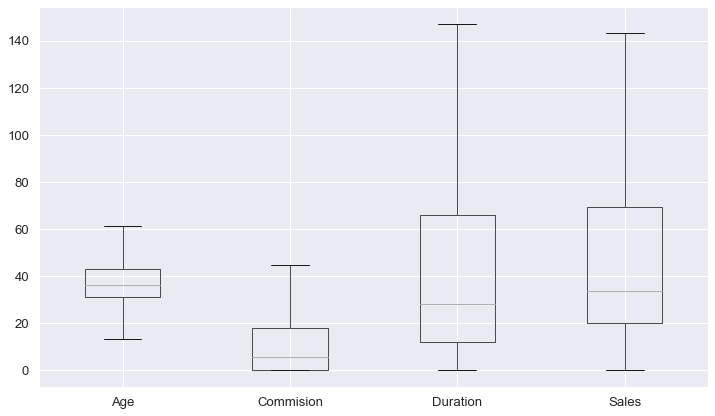

In [201]:
plt.figure(figsize=(12,7))
r_df[['Age', 'Commision', 'Duration', 'Sales']].boxplot()
plt.show()

In [202]:
r_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,C2B,Airlines,No,0.70,Online,7.0,2.51,Customised Plan,ASIA
1,36.0,EPX,Travel Agency,No,0.00,Online,34.0,20.00,Customised Plan,ASIA
2,39.0,CWT,Travel Agency,No,5.94,Online,3.0,9.90,Customised Plan,Americas
3,36.0,EPX,Travel Agency,No,0.00,Online,4.0,26.00,Cancellation Plan,ASIA
4,33.0,JZI,Airlines,No,6.30,Online,53.0,18.00,Bronze Plan,ASIA


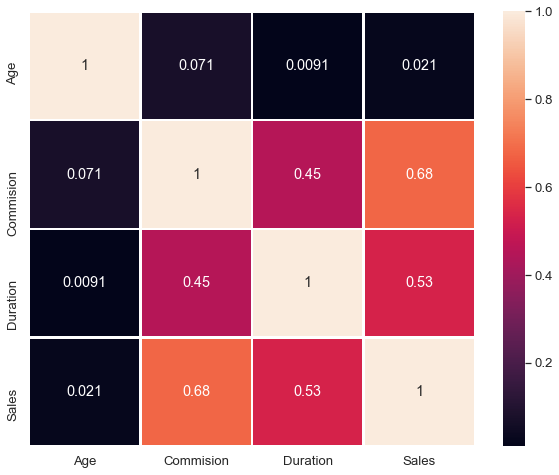

In [203]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(r_df[['Age', 'Commision', 'Duration', 'Sales']].corr(),linewidths=1.5, annot=True);

In [91]:
for feature in r_df.columns: 
    if r_df[feature].dtype == 'object': 
        r_df[feature] = pd.Categorical(r_df[feature]).codes

In [205]:
r_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [206]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   float64
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   float64
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 193.1 KB


In [92]:
rX = r_df.drop(["Claimed"], axis=1)
rY = r_df.pop("Claimed")

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(rX, rY, test_size=.30, random_state=1)

In [209]:
param_grid = {
    'max_depth': [5,6],
    'max_features': [5],
    'min_samples_leaf': [8,10],
    'min_samples_split': [20,30],
    'n_estimators': [150, 250]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid,scoring='recall', cv = 3)


In [94]:
rfcl = RandomForestClassifier(n_estimators = 250,min_samples_leaf=8,min_samples_split=20,max_features=5,max_depth=5,random_state=1)


In [95]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
# rfcl = RandomForestClassifier(n_estimators = 250,min_samples_leaf=8,min_samples_split=15,max_features=5,max_depth=5,random_state=1)
best_grid = rfcl.fit(X_train, train_labels)

In [213]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [5, 6], 'max_features': [5],
                         'min_samples_leaf': [8, 10],
                         'min_samples_split': [20, 30],
                         'n_estimators': [150, 250]},
             scoring='recall')

In [214]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 30,
 'n_estimators': 250}

In [173]:
# best_grid = grid_search.best_estimator_

In [96]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

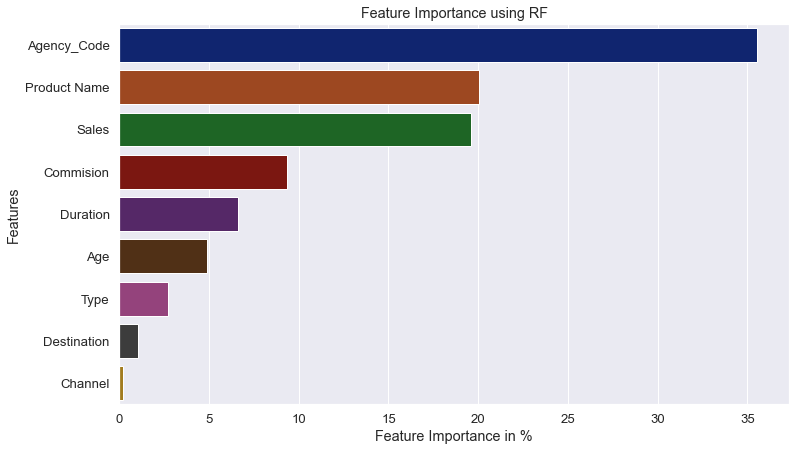

In [218]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [219]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.521901,0.478099
1,0.917523,0.082477
2,0.349334,0.650666
3,0.776515,0.223485
4,0.725017,0.274983


**AUC and ROC for the training data**

AUC: 0.844


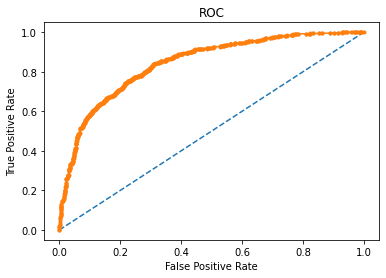

In [130]:
# predict probabilities
rfprobs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
rfprobs = rfprobs[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(train_labels, rfprobs)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(train_labels, rfprobs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**AUC and ROC for the test data**

AUC: 0.822


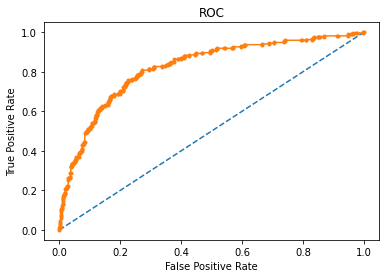

In [98]:
# predict probabilities
rfprobs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfprobs = rfprobs[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(test_labels, rfprobs)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_labels, rfprobs)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

**Confusion Matrix for train data**

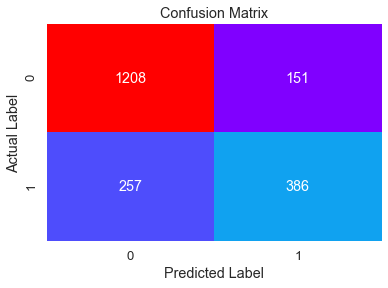

In [222]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [223]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1359
           1       0.72      0.60      0.65       643

    accuracy                           0.80      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.80      0.79      2002



In [131]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7962037962037962

In [99]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.72
rf_train_recall  0.6
rf_train_f1  0.65


**Confusion Matrix for test data**

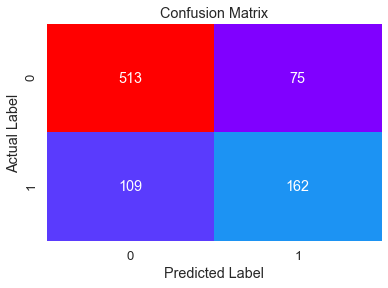

In [226]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [227]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.64       271

    accuracy                           0.79       859
   macro avg       0.75      0.74      0.74       859
weighted avg       0.78      0.79      0.78       859



In [100]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7857974388824214

In [101]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.6
rf_test_f1  0.64


In [102]:
threshold=0.3
predicted = (best_grid.predict_proba(X_test)[:,1]>=threshold).astype('int')

In [231]:
print(classification_report(test_labels, predicted))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       588
           1       0.59      0.76      0.66       271

    accuracy                           0.76       859
   macro avg       0.73      0.76      0.74       859
weighted avg       0.78      0.76      0.76       859



In [103]:
rf_test_acc_threshold=best_grid.score(X_test,predicted)
rf_test_acc_threshold

0.8649592549476135

In [104]:
rf_test_auc_threshold = roc_auc_score(test_labels, predicted)
print('AUC: %.3f' % rf_test_auc_threshold)

AUC: 0.758


In [105]:
rf_metrics=classification_report(test_labels, predicted,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision_threshold=round(df.loc["1"][0],2)
rf_test_recall_threshold=round(df.loc["1"][1],2)
rf_test_f1_threshold=round(df.loc["1"][2],2)
print ('rf_test_precision_threshold ',rf_test_precision_threshold)
print ('rf_test_recall_threshold ',rf_test_recall_threshold)
print ('rf_test_f1_threshold ',rf_test_f1_threshold)

rf_test_precision_threshold  0.59
rf_test_recall_threshold  0.76
rf_test_f1_threshold  0.66


# Random Forest Conclusion

<b>Train Data:</b><br>
AUC: 84%<br>
Accuracy: 80%<br>
Precision: 72%<br>
Recall: 60%<br>
f1-Score: 65%<br>

<b>Test Data:</b><br>
AUC: 82%<br>
Accuracy: 79%<br>
Precision: 68%<br>
Recall: 60%<br>
f1-Score: 64%

#  Building a Neural Network Classifier

In [106]:
ann_df=t_ins_df.copy()
ann_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [432]:
# dups = ann_df.duplicated()
# print('Number of duplicate rows = %d' % (dups.sum()))

In [389]:
# ann_df.drop_duplicates(inplace=True)

In [330]:
# dups = ann_df.duplicated()
# print('Number of duplicate rows = %d' % (dups.sum()))

In [236]:
ann_df.shape

(2861, 10)

In [237]:
ann_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.124082,135.975287,0.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


In [107]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [108]:
for feature in ann_df[['Age', 'Commision', 'Duration', 'Sales']]: 
    lr,ur=treat_outlier(ann_df[feature])
    ann_df[feature]=np.where(ann_df[feature]>ur,ur,ann_df[feature])
    ann_df[feature]=np.where(ann_df[feature]<lr,lr,ann_df[feature])

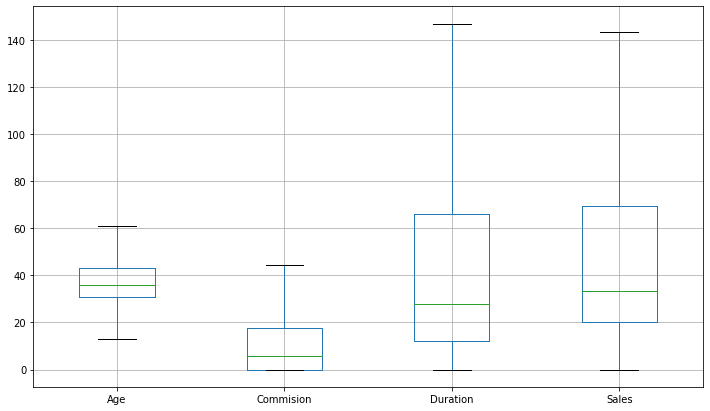

In [8]:
plt.figure(figsize=(12,7))
ann_df[['Age', 'Commision', 'Duration', 'Sales']].boxplot()
plt.show()

In [241]:
ann_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [109]:
for feature in ann_df.columns: 
    if ann_df[feature].dtype == 'object': 
        ann_df[feature] = pd.Categorical(ann_df[feature]).codes

In [10]:
ann_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [244]:
ann_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,37.896190,9.821593,13.0,31.0,36.00,43.00,61.00
Agency_Code,2861.0,1.280671,1.003773,0.0,0.0,2.00,2.00,3.00
Type,2861.0,0.597344,0.490518,0.0,0.0,1.00,1.00,1.00
Claimed,2861.0,0.319469,0.466352,0.0,0.0,0.00,1.00,1.00
Commision,2861.0,11.756865,15.502632,0.0,0.0,5.63,17.82,44.55
Channel,2861.0,0.983922,0.125799,0.0,1.0,1.00,1.00,1.00
Duration,2861.0,47.342887,47.294283,0.0,12.0,28.00,66.00,147.00
Sales,2861.0,51.085089,42.604294,0.0,20.0,33.50,69.30,143.25
Product Name,2861.0,1.666550,1.277822,0.0,1.0,2.00,2.00,4.00
Destination,2861.0,0.261797,0.586239,0.0,0.0,0.00,0.00,2.00


In [110]:
nX = ann_df.drop(["Claimed"], axis=1)
nY = ann_df.pop("Claimed")

In [111]:
nX_train, nX_test, ntrain_labels, ntest_labels = train_test_split(nX, nY, test_size=.30, random_state=1)

In [12]:
print('nX_train: ',nX_train.shape)
print('nX_test: ',nX_test.shape)
print('ntrain_labels: ',ntrain_labels.shape)
print('ntest_labels: ',ntest_labels.shape)

nX_train:  (2002, 9)
nX_test:  (859, 9)
ntrain_labels:  (2002,)
ntest_labels:  (859,)


In [112]:
sc = StandardScaler()

In [113]:
#Scale the training data
nX_train = sc.fit_transform(nX_train)

In [15]:
nX_train

array([[ 2.35126368, -1.2626112 , -1.19813318, ..., -0.84677146,
        -1.31338076, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.37328775,
         0.24339146, -0.44775345],
       [ 2.24905924, -0.27289013,  0.83463176, ...,  0.43873682,
         0.24339146,  1.24676906],
       ...,
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.89411983,
        -0.53499465, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ...,  1.44962454,
         0.24339146, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ...,  1.44962454,
         0.24339146,  1.24676906]])

In [114]:
nX_test = sc.transform(nX_test)

In [17]:
nX_test

array([[-0.71486952, -0.27289013,  0.83463176, ...,  1.09451176,
         0.24339146, -0.44775345],
       [ 2.35126368,  0.71683095,  0.83463176, ..., -0.51533286,
        -0.53499465, -0.44775345],
       [ 0.40937932, -1.2626112 , -1.19813318, ...,  0.78674734,
         1.80016368, -0.44775345],
       ...,
       [ 1.32921928, -1.2626112 , -1.19813318, ..., -0.82309727,
        -1.31338076, -0.44775345],
       [ 1.53362816,  0.71683095,  0.83463176, ..., -0.70472634,
         0.24339146, -0.44775345],
       [-0.20384732,  0.71683095,  0.83463176, ..., -0.70472634,
         0.24339146, -0.44775345]])

In [115]:
param_grid = {
    'hidden_layer_sizes': [100,200], # 50, 200
    'max_iter': [1500,2000,2500],
    'solver': ['adam'],
    'tol': [0.0001],
    'activation':['relu'],
    'verbose':['True'],
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl,param_grid = param_grid,scoring='recall',cv = 3)

In [116]:
grid_search.fit(nX_train, ntrain_labels)

Iteration 1, loss = 0.70771931
Iteration 2, loss = 0.64903739
Iteration 3, loss = 0.60548192
Iteration 4, loss = 0.57541476
Iteration 5, loss = 0.55524878
Iteration 6, loss = 0.54198773
Iteration 7, loss = 0.53250931
Iteration 8, loss = 0.52683452
Iteration 9, loss = 0.52251615
Iteration 10, loss = 0.51995650
Iteration 11, loss = 0.51786217
Iteration 12, loss = 0.51623342
Iteration 13, loss = 0.51484601
Iteration 14, loss = 0.51388020
Iteration 15, loss = 0.51266395
Iteration 16, loss = 0.51192998
Iteration 17, loss = 0.51113614
Iteration 18, loss = 0.51024047
Iteration 19, loss = 0.50955115
Iteration 20, loss = 0.50878908
Iteration 21, loss = 0.50823318
Iteration 22, loss = 0.50752706
Iteration 23, loss = 0.50679127
Iteration 24, loss = 0.50618551
Iteration 25, loss = 0.50557505
Iteration 26, loss = 0.50493373
Iteration 27, loss = 0.50449349
Iteration 28, loss = 0.50395062
Iteration 29, loss = 0.50350744
Iteration 30, loss = 0.50281919
Iteration 31, loss = 0.50249188
Iteration 32, los

Iteration 262, loss = 0.45799003
Iteration 263, loss = 0.45784225
Iteration 264, loss = 0.45793967
Iteration 265, loss = 0.45759431
Iteration 266, loss = 0.45773695
Iteration 267, loss = 0.45713974
Iteration 268, loss = 0.45719069
Iteration 269, loss = 0.45731792
Iteration 270, loss = 0.45713371
Iteration 271, loss = 0.45684400
Iteration 272, loss = 0.45695228
Iteration 273, loss = 0.45708572
Iteration 274, loss = 0.45694900
Iteration 275, loss = 0.45673650
Iteration 276, loss = 0.45644921
Iteration 277, loss = 0.45636630
Iteration 278, loss = 0.45629998
Iteration 279, loss = 0.45659796
Iteration 280, loss = 0.45607791
Iteration 281, loss = 0.45592559
Iteration 282, loss = 0.45581650
Iteration 283, loss = 0.45568038
Iteration 284, loss = 0.45563378
Iteration 285, loss = 0.45594825
Iteration 286, loss = 0.45560579
Iteration 287, loss = 0.45559952
Iteration 288, loss = 0.45521833
Iteration 289, loss = 0.45532718
Iteration 290, loss = 0.45508877
Iteration 291, loss = 0.45511891
Iteration 

Iteration 515, loss = 0.43787444
Iteration 516, loss = 0.43736708
Iteration 517, loss = 0.43739439
Iteration 518, loss = 0.43667411
Iteration 519, loss = 0.43732694
Iteration 520, loss = 0.43684376
Iteration 521, loss = 0.43666637
Iteration 522, loss = 0.43731744
Iteration 523, loss = 0.43689852
Iteration 524, loss = 0.43691988
Iteration 525, loss = 0.43697007
Iteration 526, loss = 0.43619710
Iteration 527, loss = 0.43662648
Iteration 528, loss = 0.43633737
Iteration 529, loss = 0.43631200
Iteration 530, loss = 0.43615182
Iteration 531, loss = 0.43611947
Iteration 532, loss = 0.43604992
Iteration 533, loss = 0.43611298
Iteration 534, loss = 0.43582619
Iteration 535, loss = 0.43638340
Iteration 536, loss = 0.43601958
Iteration 537, loss = 0.43610910
Iteration 538, loss = 0.43576710
Iteration 539, loss = 0.43499573
Iteration 540, loss = 0.43575740
Iteration 541, loss = 0.43569818
Iteration 542, loss = 0.43518756
Iteration 543, loss = 0.43552103
Iteration 544, loss = 0.43529728
Iteration 

Iteration 173, loss = 0.44747091
Iteration 174, loss = 0.44735724
Iteration 175, loss = 0.44738160
Iteration 176, loss = 0.44722268
Iteration 177, loss = 0.44695374
Iteration 178, loss = 0.44700875
Iteration 179, loss = 0.44683770
Iteration 180, loss = 0.44687425
Iteration 181, loss = 0.44638536
Iteration 182, loss = 0.44644948
Iteration 183, loss = 0.44615516
Iteration 184, loss = 0.44611684
Iteration 185, loss = 0.44607524
Iteration 186, loss = 0.44592880
Iteration 187, loss = 0.44584267
Iteration 188, loss = 0.44546495
Iteration 189, loss = 0.44558764
Iteration 190, loss = 0.44550332
Iteration 191, loss = 0.44566323
Iteration 192, loss = 0.44512128
Iteration 193, loss = 0.44503161
Iteration 194, loss = 0.44490551
Iteration 195, loss = 0.44472144
Iteration 196, loss = 0.44478407
Iteration 197, loss = 0.44468241
Iteration 198, loss = 0.44416094
Iteration 199, loss = 0.44421158
Iteration 200, loss = 0.44433757
Iteration 201, loss = 0.44393936
Iteration 202, loss = 0.44385286
Iteration 

Iteration 442, loss = 0.42364984
Iteration 443, loss = 0.42371827
Iteration 444, loss = 0.42373691
Iteration 445, loss = 0.42322614
Iteration 446, loss = 0.42346190
Iteration 447, loss = 0.42340162
Iteration 448, loss = 0.42322918
Iteration 449, loss = 0.42367463
Iteration 450, loss = 0.42287462
Iteration 451, loss = 0.42291758
Iteration 452, loss = 0.42313246
Iteration 453, loss = 0.42281365
Iteration 454, loss = 0.42289980
Iteration 455, loss = 0.42244552
Iteration 456, loss = 0.42324577
Iteration 457, loss = 0.42232858
Iteration 458, loss = 0.42223004
Iteration 459, loss = 0.42289564
Iteration 460, loss = 0.42201614
Iteration 461, loss = 0.42200569
Iteration 462, loss = 0.42206015
Iteration 463, loss = 0.42199410
Iteration 464, loss = 0.42224541
Iteration 465, loss = 0.42222865
Iteration 466, loss = 0.42185513
Iteration 467, loss = 0.42186054
Iteration 468, loss = 0.42183576
Iteration 469, loss = 0.42159661
Iteration 470, loss = 0.42138455
Iteration 471, loss = 0.42153597
Iteration 

Iteration 693, loss = 0.41040500
Iteration 694, loss = 0.40987412
Iteration 695, loss = 0.40921566
Iteration 696, loss = 0.40903042
Iteration 697, loss = 0.40918654
Iteration 698, loss = 0.40888696
Iteration 699, loss = 0.40852949
Iteration 700, loss = 0.40901372
Iteration 701, loss = 0.40902952
Iteration 702, loss = 0.40895531
Iteration 703, loss = 0.40925752
Iteration 704, loss = 0.40863223
Iteration 705, loss = 0.40903648
Iteration 706, loss = 0.40853113
Iteration 707, loss = 0.40877642
Iteration 708, loss = 0.40828372
Iteration 709, loss = 0.40882547
Iteration 710, loss = 0.40855482
Iteration 711, loss = 0.40797523
Iteration 712, loss = 0.40824836
Iteration 713, loss = 0.40795036
Iteration 714, loss = 0.40835076
Iteration 715, loss = 0.40791006
Iteration 716, loss = 0.40795928
Iteration 717, loss = 0.40924920
Iteration 718, loss = 0.40855115
Iteration 719, loss = 0.40775968
Iteration 720, loss = 0.40785519
Iteration 721, loss = 0.40772650
Iteration 722, loss = 0.40803194
Iteration 

Iteration 151, loss = 0.46005560
Iteration 152, loss = 0.45992731
Iteration 153, loss = 0.45968901
Iteration 154, loss = 0.45946821
Iteration 155, loss = 0.45944934
Iteration 156, loss = 0.45962361
Iteration 157, loss = 0.45945003
Iteration 158, loss = 0.45893792
Iteration 159, loss = 0.45905286
Iteration 160, loss = 0.45907742
Iteration 161, loss = 0.45869948
Iteration 162, loss = 0.45892358
Iteration 163, loss = 0.45826324
Iteration 164, loss = 0.45827077
Iteration 165, loss = 0.45820036
Iteration 166, loss = 0.45814700
Iteration 167, loss = 0.45797200
Iteration 168, loss = 0.45797348
Iteration 169, loss = 0.45792716
Iteration 170, loss = 0.45764671
Iteration 171, loss = 0.45788316
Iteration 172, loss = 0.45747942
Iteration 173, loss = 0.45732925
Iteration 174, loss = 0.45723860
Iteration 175, loss = 0.45730670
Iteration 176, loss = 0.45729543
Iteration 177, loss = 0.45676386
Iteration 178, loss = 0.45709705
Iteration 179, loss = 0.45684031
Iteration 180, loss = 0.45680121
Iteration 

Iteration 407, loss = 0.43659416
Iteration 408, loss = 0.43652046
Iteration 409, loss = 0.43629498
Iteration 410, loss = 0.43615885
Iteration 411, loss = 0.43653292
Iteration 412, loss = 0.43698023
Iteration 413, loss = 0.43612341
Iteration 414, loss = 0.43614350
Iteration 415, loss = 0.43619313
Iteration 416, loss = 0.43597954
Iteration 417, loss = 0.43590033
Iteration 418, loss = 0.43609812
Iteration 419, loss = 0.43561189
Iteration 420, loss = 0.43580801
Iteration 421, loss = 0.43568751
Iteration 422, loss = 0.43517609
Iteration 423, loss = 0.43517779
Iteration 424, loss = 0.43545174
Iteration 425, loss = 0.43528247
Iteration 426, loss = 0.43521381
Iteration 427, loss = 0.43581600
Iteration 428, loss = 0.43527702
Iteration 429, loss = 0.43498042
Iteration 430, loss = 0.43565428
Iteration 431, loss = 0.43467504
Iteration 432, loss = 0.43508593
Iteration 433, loss = 0.43508824
Iteration 434, loss = 0.43552059
Iteration 435, loss = 0.43513118
Iteration 436, loss = 0.43425163
Iteration 

Iteration 1, loss = 0.70771931
Iteration 2, loss = 0.64903739
Iteration 3, loss = 0.60548192
Iteration 4, loss = 0.57541476
Iteration 5, loss = 0.55524878
Iteration 6, loss = 0.54198773
Iteration 7, loss = 0.53250931
Iteration 8, loss = 0.52683452
Iteration 9, loss = 0.52251615
Iteration 10, loss = 0.51995650
Iteration 11, loss = 0.51786217
Iteration 12, loss = 0.51623342
Iteration 13, loss = 0.51484601
Iteration 14, loss = 0.51388020
Iteration 15, loss = 0.51266395
Iteration 16, loss = 0.51192998
Iteration 17, loss = 0.51113614
Iteration 18, loss = 0.51024047
Iteration 19, loss = 0.50955115
Iteration 20, loss = 0.50878908
Iteration 21, loss = 0.50823318
Iteration 22, loss = 0.50752706
Iteration 23, loss = 0.50679127
Iteration 24, loss = 0.50618551
Iteration 25, loss = 0.50557505
Iteration 26, loss = 0.50493373
Iteration 27, loss = 0.50449349
Iteration 28, loss = 0.50395062
Iteration 29, loss = 0.50350744
Iteration 30, loss = 0.50281919
Iteration 31, loss = 0.50249188
Iteration 32, los

Iteration 263, loss = 0.45784225
Iteration 264, loss = 0.45793967
Iteration 265, loss = 0.45759431
Iteration 266, loss = 0.45773695
Iteration 267, loss = 0.45713974
Iteration 268, loss = 0.45719069
Iteration 269, loss = 0.45731792
Iteration 270, loss = 0.45713371
Iteration 271, loss = 0.45684400
Iteration 272, loss = 0.45695228
Iteration 273, loss = 0.45708572
Iteration 274, loss = 0.45694900
Iteration 275, loss = 0.45673650
Iteration 276, loss = 0.45644921
Iteration 277, loss = 0.45636630
Iteration 278, loss = 0.45629998
Iteration 279, loss = 0.45659796
Iteration 280, loss = 0.45607791
Iteration 281, loss = 0.45592559
Iteration 282, loss = 0.45581650
Iteration 283, loss = 0.45568038
Iteration 284, loss = 0.45563378
Iteration 285, loss = 0.45594825
Iteration 286, loss = 0.45560579
Iteration 287, loss = 0.45559952
Iteration 288, loss = 0.45521833
Iteration 289, loss = 0.45532718
Iteration 290, loss = 0.45508877
Iteration 291, loss = 0.45511891
Iteration 292, loss = 0.45487111
Iteration 

Iteration 520, loss = 0.43684376
Iteration 521, loss = 0.43666637
Iteration 522, loss = 0.43731744
Iteration 523, loss = 0.43689852
Iteration 524, loss = 0.43691988
Iteration 525, loss = 0.43697007
Iteration 526, loss = 0.43619710
Iteration 527, loss = 0.43662648
Iteration 528, loss = 0.43633737
Iteration 529, loss = 0.43631200
Iteration 530, loss = 0.43615182
Iteration 531, loss = 0.43611947
Iteration 532, loss = 0.43604992
Iteration 533, loss = 0.43611298
Iteration 534, loss = 0.43582619
Iteration 535, loss = 0.43638340
Iteration 536, loss = 0.43601958
Iteration 537, loss = 0.43610910
Iteration 538, loss = 0.43576710
Iteration 539, loss = 0.43499573
Iteration 540, loss = 0.43575740
Iteration 541, loss = 0.43569818
Iteration 542, loss = 0.43518756
Iteration 543, loss = 0.43552103
Iteration 544, loss = 0.43529728
Iteration 545, loss = 0.43502860
Iteration 546, loss = 0.43519837
Iteration 547, loss = 0.43515394
Iteration 548, loss = 0.43483835
Iteration 549, loss = 0.43494181
Iteration 

Iteration 158, loss = 0.44968601
Iteration 159, loss = 0.44962683
Iteration 160, loss = 0.44946484
Iteration 161, loss = 0.44906548
Iteration 162, loss = 0.44906169
Iteration 163, loss = 0.44859473
Iteration 164, loss = 0.44875927
Iteration 165, loss = 0.44872223
Iteration 166, loss = 0.44838066
Iteration 167, loss = 0.44875992
Iteration 168, loss = 0.44806668
Iteration 169, loss = 0.44815243
Iteration 170, loss = 0.44792908
Iteration 171, loss = 0.44770305
Iteration 172, loss = 0.44770310
Iteration 173, loss = 0.44747091
Iteration 174, loss = 0.44735724
Iteration 175, loss = 0.44738160
Iteration 176, loss = 0.44722268
Iteration 177, loss = 0.44695374
Iteration 178, loss = 0.44700875
Iteration 179, loss = 0.44683770
Iteration 180, loss = 0.44687425
Iteration 181, loss = 0.44638536
Iteration 182, loss = 0.44644948
Iteration 183, loss = 0.44615516
Iteration 184, loss = 0.44611684
Iteration 185, loss = 0.44607524
Iteration 186, loss = 0.44592880
Iteration 187, loss = 0.44584267
Iteration 

Iteration 429, loss = 0.42421662
Iteration 430, loss = 0.42431042
Iteration 431, loss = 0.42400282
Iteration 432, loss = 0.42411189
Iteration 433, loss = 0.42373912
Iteration 434, loss = 0.42519814
Iteration 435, loss = 0.42428054
Iteration 436, loss = 0.42398613
Iteration 437, loss = 0.42384241
Iteration 438, loss = 0.42447443
Iteration 439, loss = 0.42381561
Iteration 440, loss = 0.42385304
Iteration 441, loss = 0.42358911
Iteration 442, loss = 0.42364984
Iteration 443, loss = 0.42371827
Iteration 444, loss = 0.42373691
Iteration 445, loss = 0.42322614
Iteration 446, loss = 0.42346190
Iteration 447, loss = 0.42340162
Iteration 448, loss = 0.42322918
Iteration 449, loss = 0.42367463
Iteration 450, loss = 0.42287462
Iteration 451, loss = 0.42291758
Iteration 452, loss = 0.42313246
Iteration 453, loss = 0.42281365
Iteration 454, loss = 0.42289980
Iteration 455, loss = 0.42244552
Iteration 456, loss = 0.42324577
Iteration 457, loss = 0.42232858
Iteration 458, loss = 0.42223004
Iteration 

Iteration 680, loss = 0.41033630
Iteration 681, loss = 0.40955661
Iteration 682, loss = 0.40957147
Iteration 683, loss = 0.40989757
Iteration 684, loss = 0.41056058
Iteration 685, loss = 0.40985993
Iteration 686, loss = 0.40927420
Iteration 687, loss = 0.40961673
Iteration 688, loss = 0.40945510
Iteration 689, loss = 0.40953055
Iteration 690, loss = 0.40954369
Iteration 691, loss = 0.40981594
Iteration 692, loss = 0.40924877
Iteration 693, loss = 0.41040500
Iteration 694, loss = 0.40987412
Iteration 695, loss = 0.40921566
Iteration 696, loss = 0.40903042
Iteration 697, loss = 0.40918654
Iteration 698, loss = 0.40888696
Iteration 699, loss = 0.40852949
Iteration 700, loss = 0.40901372
Iteration 701, loss = 0.40902952
Iteration 702, loss = 0.40895531
Iteration 703, loss = 0.40925752
Iteration 704, loss = 0.40863223
Iteration 705, loss = 0.40903648
Iteration 706, loss = 0.40853113
Iteration 707, loss = 0.40877642
Iteration 708, loss = 0.40828372
Iteration 709, loss = 0.40882547
Iteration 

Iteration 118, loss = 0.46455824
Iteration 119, loss = 0.46425052
Iteration 120, loss = 0.46474319
Iteration 121, loss = 0.46408986
Iteration 122, loss = 0.46388088
Iteration 123, loss = 0.46380860
Iteration 124, loss = 0.46370618
Iteration 125, loss = 0.46371941
Iteration 126, loss = 0.46340554
Iteration 127, loss = 0.46336351
Iteration 128, loss = 0.46313121
Iteration 129, loss = 0.46289987
Iteration 130, loss = 0.46272837
Iteration 131, loss = 0.46253615
Iteration 132, loss = 0.46269771
Iteration 133, loss = 0.46277000
Iteration 134, loss = 0.46214808
Iteration 135, loss = 0.46202988
Iteration 136, loss = 0.46188117
Iteration 137, loss = 0.46167533
Iteration 138, loss = 0.46167352
Iteration 139, loss = 0.46154701
Iteration 140, loss = 0.46157837
Iteration 141, loss = 0.46156875
Iteration 142, loss = 0.46118330
Iteration 143, loss = 0.46097627
Iteration 144, loss = 0.46112039
Iteration 145, loss = 0.46077013
Iteration 146, loss = 0.46041025
Iteration 147, loss = 0.46080095
Iteration 

Iteration 378, loss = 0.43919899
Iteration 379, loss = 0.43892199
Iteration 380, loss = 0.43870583
Iteration 381, loss = 0.43889854
Iteration 382, loss = 0.43888038
Iteration 383, loss = 0.43870139
Iteration 384, loss = 0.43870843
Iteration 385, loss = 0.43860831
Iteration 386, loss = 0.43823460
Iteration 387, loss = 0.43831735
Iteration 388, loss = 0.43841692
Iteration 389, loss = 0.43852269
Iteration 390, loss = 0.43776740
Iteration 391, loss = 0.43804250
Iteration 392, loss = 0.43809582
Iteration 393, loss = 0.43747884
Iteration 394, loss = 0.43757425
Iteration 395, loss = 0.43756282
Iteration 396, loss = 0.43795292
Iteration 397, loss = 0.43826603
Iteration 398, loss = 0.43696790
Iteration 399, loss = 0.43716789
Iteration 400, loss = 0.43743723
Iteration 401, loss = 0.43687463
Iteration 402, loss = 0.43692875
Iteration 403, loss = 0.43705406
Iteration 404, loss = 0.43684902
Iteration 405, loss = 0.43665061
Iteration 406, loss = 0.43666217
Iteration 407, loss = 0.43659416
Iteration 

Iteration 636, loss = 0.42126599
Iteration 637, loss = 0.42124124
Iteration 638, loss = 0.42163823
Iteration 639, loss = 0.42137570
Iteration 640, loss = 0.42120917
Iteration 641, loss = 0.42099674
Iteration 642, loss = 0.42145894
Iteration 643, loss = 0.42115953
Iteration 644, loss = 0.42103064
Iteration 645, loss = 0.42118484
Iteration 646, loss = 0.42119815
Iteration 647, loss = 0.42104527
Iteration 648, loss = 0.42049065
Iteration 649, loss = 0.42096401
Iteration 650, loss = 0.42107738
Iteration 651, loss = 0.42071707
Iteration 652, loss = 0.42026752
Iteration 653, loss = 0.42038264
Iteration 654, loss = 0.42023832
Iteration 655, loss = 0.41992645
Iteration 656, loss = 0.42008810
Iteration 657, loss = 0.41992841
Iteration 658, loss = 0.42034490
Iteration 659, loss = 0.42088267
Iteration 660, loss = 0.41996735
Iteration 661, loss = 0.42031156
Iteration 662, loss = 0.41989500
Iteration 663, loss = 0.41986339
Iteration 664, loss = 0.42013224
Iteration 665, loss = 0.42007182
Iteration 

Iteration 219, loss = 0.46279903
Iteration 220, loss = 0.46283334
Iteration 221, loss = 0.46245662
Iteration 222, loss = 0.46205651
Iteration 223, loss = 0.46214351
Iteration 224, loss = 0.46190916
Iteration 225, loss = 0.46216512
Iteration 226, loss = 0.46176679
Iteration 227, loss = 0.46142721
Iteration 228, loss = 0.46174768
Iteration 229, loss = 0.46209085
Iteration 230, loss = 0.46127804
Iteration 231, loss = 0.46134123
Iteration 232, loss = 0.46181278
Iteration 233, loss = 0.46080491
Iteration 234, loss = 0.46103989
Iteration 235, loss = 0.46075214
Iteration 236, loss = 0.46065376
Iteration 237, loss = 0.46086736
Iteration 238, loss = 0.46038167
Iteration 239, loss = 0.46034750
Iteration 240, loss = 0.46008405
Iteration 241, loss = 0.46072721
Iteration 242, loss = 0.46005952
Iteration 243, loss = 0.45985663
Iteration 244, loss = 0.45971875
Iteration 245, loss = 0.45994077
Iteration 246, loss = 0.45973147
Iteration 247, loss = 0.45976936
Iteration 248, loss = 0.45945007
Iteration 

Iteration 488, loss = 0.43905621
Iteration 489, loss = 0.43898837
Iteration 490, loss = 0.43871620
Iteration 491, loss = 0.43917114
Iteration 492, loss = 0.43903923
Iteration 493, loss = 0.43851252
Iteration 494, loss = 0.43858839
Iteration 495, loss = 0.43833232
Iteration 496, loss = 0.43839721
Iteration 497, loss = 0.43857457
Iteration 498, loss = 0.43829638
Iteration 499, loss = 0.43808685
Iteration 500, loss = 0.43802810
Iteration 501, loss = 0.43804932
Iteration 502, loss = 0.43786232
Iteration 503, loss = 0.43791285
Iteration 504, loss = 0.43790122
Iteration 505, loss = 0.43802779
Iteration 506, loss = 0.43792893
Iteration 507, loss = 0.43794224
Iteration 508, loss = 0.43775676
Iteration 509, loss = 0.43733428
Iteration 510, loss = 0.43793800
Iteration 511, loss = 0.43775769
Iteration 512, loss = 0.43747170
Iteration 513, loss = 0.43708406
Iteration 514, loss = 0.43802951
Iteration 515, loss = 0.43787444
Iteration 516, loss = 0.43736708
Iteration 517, loss = 0.43739439
Iteration 

Iteration 126, loss = 0.45447827
Iteration 127, loss = 0.45497363
Iteration 128, loss = 0.45424498
Iteration 129, loss = 0.45387883
Iteration 130, loss = 0.45375822
Iteration 131, loss = 0.45379568
Iteration 132, loss = 0.45328134
Iteration 133, loss = 0.45332788
Iteration 134, loss = 0.45293472
Iteration 135, loss = 0.45287170
Iteration 136, loss = 0.45263760
Iteration 137, loss = 0.45262833
Iteration 138, loss = 0.45262833
Iteration 139, loss = 0.45236784
Iteration 140, loss = 0.45233927
Iteration 141, loss = 0.45201641
Iteration 142, loss = 0.45184804
Iteration 143, loss = 0.45178361
Iteration 144, loss = 0.45165507
Iteration 145, loss = 0.45149831
Iteration 146, loss = 0.45095728
Iteration 147, loss = 0.45089848
Iteration 148, loss = 0.45071018
Iteration 149, loss = 0.45061476
Iteration 150, loss = 0.45051555
Iteration 151, loss = 0.45041143
Iteration 152, loss = 0.45019174
Iteration 153, loss = 0.45022549
Iteration 154, loss = 0.45030690
Iteration 155, loss = 0.44977254
Iteration 

Iteration 394, loss = 0.42709758
Iteration 395, loss = 0.42650968
Iteration 396, loss = 0.42640693
Iteration 397, loss = 0.42728501
Iteration 398, loss = 0.42642580
Iteration 399, loss = 0.42599312
Iteration 400, loss = 0.42612635
Iteration 401, loss = 0.42643886
Iteration 402, loss = 0.42647482
Iteration 403, loss = 0.42617925
Iteration 404, loss = 0.42610604
Iteration 405, loss = 0.42580698
Iteration 406, loss = 0.42564677
Iteration 407, loss = 0.42584791
Iteration 408, loss = 0.42626451
Iteration 409, loss = 0.42569875
Iteration 410, loss = 0.42554683
Iteration 411, loss = 0.42536434
Iteration 412, loss = 0.42557294
Iteration 413, loss = 0.42518778
Iteration 414, loss = 0.42510722
Iteration 415, loss = 0.42552307
Iteration 416, loss = 0.42495363
Iteration 417, loss = 0.42497189
Iteration 418, loss = 0.42477717
Iteration 419, loss = 0.42493738
Iteration 420, loss = 0.42459274
Iteration 421, loss = 0.42481132
Iteration 422, loss = 0.42453577
Iteration 423, loss = 0.42488878
Iteration 

Iteration 644, loss = 0.41186604
Iteration 645, loss = 0.41194106
Iteration 646, loss = 0.41134247
Iteration 647, loss = 0.41178752
Iteration 648, loss = 0.41124160
Iteration 649, loss = 0.41140867
Iteration 650, loss = 0.41214054
Iteration 651, loss = 0.41204401
Iteration 652, loss = 0.41109706
Iteration 653, loss = 0.41130199
Iteration 654, loss = 0.41092311
Iteration 655, loss = 0.41127009
Iteration 656, loss = 0.41104554
Iteration 657, loss = 0.41093545
Iteration 658, loss = 0.41077137
Iteration 659, loss = 0.41128924
Iteration 660, loss = 0.41123182
Iteration 661, loss = 0.41072887
Iteration 662, loss = 0.41103135
Iteration 663, loss = 0.41100272
Iteration 664, loss = 0.41068948
Iteration 665, loss = 0.41097981
Iteration 666, loss = 0.41097575
Iteration 667, loss = 0.41112982
Iteration 668, loss = 0.41042814
Iteration 669, loss = 0.41007370
Iteration 670, loss = 0.41021037
Iteration 671, loss = 0.41041005
Iteration 672, loss = 0.41008107
Iteration 673, loss = 0.41030023
Iteration 

Iteration 96, loss = 0.46825147
Iteration 97, loss = 0.46826267
Iteration 98, loss = 0.46798150
Iteration 99, loss = 0.46800414
Iteration 100, loss = 0.46777033
Iteration 101, loss = 0.46787204
Iteration 102, loss = 0.46727618
Iteration 103, loss = 0.46721806
Iteration 104, loss = 0.46700786
Iteration 105, loss = 0.46677915
Iteration 106, loss = 0.46672800
Iteration 107, loss = 0.46634446
Iteration 108, loss = 0.46627988
Iteration 109, loss = 0.46621934
Iteration 110, loss = 0.46593936
Iteration 111, loss = 0.46566435
Iteration 112, loss = 0.46550663
Iteration 113, loss = 0.46531221
Iteration 114, loss = 0.46535746
Iteration 115, loss = 0.46539058
Iteration 116, loss = 0.46485202
Iteration 117, loss = 0.46481812
Iteration 118, loss = 0.46455824
Iteration 119, loss = 0.46425052
Iteration 120, loss = 0.46474319
Iteration 121, loss = 0.46408986
Iteration 122, loss = 0.46388088
Iteration 123, loss = 0.46380860
Iteration 124, loss = 0.46370618
Iteration 125, loss = 0.46371941
Iteration 126,

Iteration 363, loss = 0.44047441
Iteration 364, loss = 0.44055787
Iteration 365, loss = 0.43967629
Iteration 366, loss = 0.43982784
Iteration 367, loss = 0.43999756
Iteration 368, loss = 0.43966297
Iteration 369, loss = 0.44013423
Iteration 370, loss = 0.43941015
Iteration 371, loss = 0.43966500
Iteration 372, loss = 0.43945179
Iteration 373, loss = 0.43929249
Iteration 374, loss = 0.43916762
Iteration 375, loss = 0.43967339
Iteration 376, loss = 0.43917789
Iteration 377, loss = 0.43930640
Iteration 378, loss = 0.43919899
Iteration 379, loss = 0.43892199
Iteration 380, loss = 0.43870583
Iteration 381, loss = 0.43889854
Iteration 382, loss = 0.43888038
Iteration 383, loss = 0.43870139
Iteration 384, loss = 0.43870843
Iteration 385, loss = 0.43860831
Iteration 386, loss = 0.43823460
Iteration 387, loss = 0.43831735
Iteration 388, loss = 0.43841692
Iteration 389, loss = 0.43852269
Iteration 390, loss = 0.43776740
Iteration 391, loss = 0.43804250
Iteration 392, loss = 0.43809582
Iteration 

Iteration 615, loss = 0.42324151
Iteration 616, loss = 0.42254944
Iteration 617, loss = 0.42233630
Iteration 618, loss = 0.42228267
Iteration 619, loss = 0.42273675
Iteration 620, loss = 0.42290247
Iteration 621, loss = 0.42270123
Iteration 622, loss = 0.42306021
Iteration 623, loss = 0.42249441
Iteration 624, loss = 0.42196121
Iteration 625, loss = 0.42202507
Iteration 626, loss = 0.42190431
Iteration 627, loss = 0.42173061
Iteration 628, loss = 0.42162752
Iteration 629, loss = 0.42213230
Iteration 630, loss = 0.42169814
Iteration 631, loss = 0.42199015
Iteration 632, loss = 0.42179544
Iteration 633, loss = 0.42199186
Iteration 634, loss = 0.42148988
Iteration 635, loss = 0.42155989
Iteration 636, loss = 0.42126599
Iteration 637, loss = 0.42124124
Iteration 638, loss = 0.42163823
Iteration 639, loss = 0.42137570
Iteration 640, loss = 0.42120917
Iteration 641, loss = 0.42099674
Iteration 642, loss = 0.42145894
Iteration 643, loss = 0.42115953
Iteration 644, loss = 0.42103064
Iteration 

Iteration 208, loss = 0.45193059
Iteration 209, loss = 0.45229146
Iteration 210, loss = 0.45236743
Iteration 211, loss = 0.45209717
Iteration 212, loss = 0.45170382
Iteration 213, loss = 0.45169801
Iteration 214, loss = 0.45178204
Iteration 215, loss = 0.45154720
Iteration 216, loss = 0.45154790
Iteration 217, loss = 0.45122543
Iteration 218, loss = 0.45097435
Iteration 219, loss = 0.45106414
Iteration 220, loss = 0.45081640
Iteration 221, loss = 0.45054386
Iteration 222, loss = 0.45045994
Iteration 223, loss = 0.45040210
Iteration 224, loss = 0.45004511
Iteration 225, loss = 0.45050579
Iteration 226, loss = 0.45047145
Iteration 227, loss = 0.45041445
Iteration 228, loss = 0.44959356
Iteration 229, loss = 0.44959710
Iteration 230, loss = 0.44978054
Iteration 231, loss = 0.44919784
Iteration 232, loss = 0.44895597
Iteration 233, loss = 0.44880145
Iteration 234, loss = 0.44880007
Iteration 235, loss = 0.44918140
Iteration 236, loss = 0.44907652
Iteration 237, loss = 0.44859096
Iteration 

Iteration 463, loss = 0.42529658
Iteration 464, loss = 0.42515042
Iteration 465, loss = 0.42464094
Iteration 466, loss = 0.42459023
Iteration 467, loss = 0.42406617
Iteration 468, loss = 0.42391947
Iteration 469, loss = 0.42417678
Iteration 470, loss = 0.42371149
Iteration 471, loss = 0.42358686
Iteration 472, loss = 0.42388924
Iteration 473, loss = 0.42392282
Iteration 474, loss = 0.42392174
Iteration 475, loss = 0.42424574
Iteration 476, loss = 0.42335842
Iteration 477, loss = 0.42435229
Iteration 478, loss = 0.42301308
Iteration 479, loss = 0.42356856
Iteration 480, loss = 0.42378201
Iteration 481, loss = 0.42306874
Iteration 482, loss = 0.42313751
Iteration 483, loss = 0.42304987
Iteration 484, loss = 0.42433560
Iteration 485, loss = 0.42334703
Iteration 486, loss = 0.42341855
Iteration 487, loss = 0.42201072
Iteration 488, loss = 0.42283509
Iteration 489, loss = 0.42395113
Iteration 490, loss = 0.42339746
Iteration 491, loss = 0.42250598
Iteration 492, loss = 0.42301364
Iteration 

Iteration 156, loss = 0.44100622
Iteration 157, loss = 0.44037303
Iteration 158, loss = 0.43976521
Iteration 159, loss = 0.43952197
Iteration 160, loss = 0.44002723
Iteration 161, loss = 0.43946057
Iteration 162, loss = 0.43917410
Iteration 163, loss = 0.43909513
Iteration 164, loss = 0.43941836
Iteration 165, loss = 0.43874766
Iteration 166, loss = 0.43912499
Iteration 167, loss = 0.43883513
Iteration 168, loss = 0.43831244
Iteration 169, loss = 0.43909728
Iteration 170, loss = 0.43799315
Iteration 171, loss = 0.43870586
Iteration 172, loss = 0.43791860
Iteration 173, loss = 0.43780136
Iteration 174, loss = 0.43735519
Iteration 175, loss = 0.43734218
Iteration 176, loss = 0.43685798
Iteration 177, loss = 0.43670769
Iteration 178, loss = 0.43728505
Iteration 179, loss = 0.43684257
Iteration 180, loss = 0.43746576
Iteration 181, loss = 0.43621627
Iteration 182, loss = 0.43662357
Iteration 183, loss = 0.43649717
Iteration 184, loss = 0.43593714
Iteration 185, loss = 0.43578991
Iteration 

Iteration 421, loss = 0.40764937
Iteration 422, loss = 0.40802281
Iteration 423, loss = 0.40780791
Iteration 424, loss = 0.40752960
Iteration 425, loss = 0.40746516
Iteration 426, loss = 0.40834049
Iteration 427, loss = 0.40717992
Iteration 428, loss = 0.40732994
Iteration 429, loss = 0.40706784
Iteration 430, loss = 0.40697406
Iteration 431, loss = 0.40710826
Iteration 432, loss = 0.40719107
Iteration 433, loss = 0.40592541
Iteration 434, loss = 0.40656161
Iteration 435, loss = 0.40687841
Iteration 436, loss = 0.40670881
Iteration 437, loss = 0.40625085
Iteration 438, loss = 0.40660823
Iteration 439, loss = 0.40565405
Iteration 440, loss = 0.40657295
Iteration 441, loss = 0.40573243
Iteration 442, loss = 0.40575373
Iteration 443, loss = 0.40563175
Iteration 444, loss = 0.40539712
Iteration 445, loss = 0.40534329
Iteration 446, loss = 0.40651586
Iteration 447, loss = 0.40453748
Iteration 448, loss = 0.40470022
Iteration 449, loss = 0.40484078
Iteration 450, loss = 0.40460017
Iteration 

Iteration 144, loss = 0.45150196
Iteration 145, loss = 0.45155875
Iteration 146, loss = 0.45175254
Iteration 147, loss = 0.45127839
Iteration 148, loss = 0.45066866
Iteration 149, loss = 0.45095242
Iteration 150, loss = 0.45085022
Iteration 151, loss = 0.45059163
Iteration 152, loss = 0.45057674
Iteration 153, loss = 0.45023300
Iteration 154, loss = 0.45088345
Iteration 155, loss = 0.45035855
Iteration 156, loss = 0.45014281
Iteration 157, loss = 0.44974549
Iteration 158, loss = 0.44970287
Iteration 159, loss = 0.44890389
Iteration 160, loss = 0.44915191
Iteration 161, loss = 0.44874623
Iteration 162, loss = 0.44894950
Iteration 163, loss = 0.44873982
Iteration 164, loss = 0.44928287
Iteration 165, loss = 0.44853989
Iteration 166, loss = 0.44795742
Iteration 167, loss = 0.44901129
Iteration 168, loss = 0.44755254
Iteration 169, loss = 0.44794847
Iteration 170, loss = 0.44707487
Iteration 171, loss = 0.44789176
Iteration 172, loss = 0.44800564
Iteration 173, loss = 0.44693304
Iteration 

Iteration 403, loss = 0.41885902
Iteration 404, loss = 0.41905077
Iteration 405, loss = 0.41897898
Iteration 406, loss = 0.41848965
Iteration 407, loss = 0.41813863
Iteration 408, loss = 0.41830276
Iteration 409, loss = 0.41821228
Iteration 410, loss = 0.41827845
Iteration 411, loss = 0.41828903
Iteration 412, loss = 0.41825514
Iteration 413, loss = 0.41802785
Iteration 414, loss = 0.41813521
Iteration 415, loss = 0.41798367
Iteration 416, loss = 0.41767392
Iteration 417, loss = 0.41792756
Iteration 418, loss = 0.41739814
Iteration 419, loss = 0.41756626
Iteration 420, loss = 0.41766922
Iteration 421, loss = 0.41685491
Iteration 422, loss = 0.41719050
Iteration 423, loss = 0.41828596
Iteration 424, loss = 0.41678711
Iteration 425, loss = 0.41752448
Iteration 426, loss = 0.41715255
Iteration 427, loss = 0.41657194
Iteration 428, loss = 0.41724981
Iteration 429, loss = 0.41677756
Iteration 430, loss = 0.41708732
Iteration 431, loss = 0.41613842
Iteration 432, loss = 0.41714438
Iteration 

Iteration 216, loss = 0.45154790
Iteration 217, loss = 0.45122543
Iteration 218, loss = 0.45097435
Iteration 219, loss = 0.45106414
Iteration 220, loss = 0.45081640
Iteration 221, loss = 0.45054386
Iteration 222, loss = 0.45045994
Iteration 223, loss = 0.45040210
Iteration 224, loss = 0.45004511
Iteration 225, loss = 0.45050579
Iteration 226, loss = 0.45047145
Iteration 227, loss = 0.45041445
Iteration 228, loss = 0.44959356
Iteration 229, loss = 0.44959710
Iteration 230, loss = 0.44978054
Iteration 231, loss = 0.44919784
Iteration 232, loss = 0.44895597
Iteration 233, loss = 0.44880145
Iteration 234, loss = 0.44880007
Iteration 235, loss = 0.44918140
Iteration 236, loss = 0.44907652
Iteration 237, loss = 0.44859096
Iteration 238, loss = 0.44845945
Iteration 239, loss = 0.44862203
Iteration 240, loss = 0.44839018
Iteration 241, loss = 0.44802441
Iteration 242, loss = 0.44788483
Iteration 243, loss = 0.44788244
Iteration 244, loss = 0.44775633
Iteration 245, loss = 0.44768300
Iteration 

Iteration 474, loss = 0.42392174
Iteration 475, loss = 0.42424574
Iteration 476, loss = 0.42335842
Iteration 477, loss = 0.42435229
Iteration 478, loss = 0.42301308
Iteration 479, loss = 0.42356856
Iteration 480, loss = 0.42378201
Iteration 481, loss = 0.42306874
Iteration 482, loss = 0.42313751
Iteration 483, loss = 0.42304987
Iteration 484, loss = 0.42433560
Iteration 485, loss = 0.42334703
Iteration 486, loss = 0.42341855
Iteration 487, loss = 0.42201072
Iteration 488, loss = 0.42283509
Iteration 489, loss = 0.42395113
Iteration 490, loss = 0.42339746
Iteration 491, loss = 0.42250598
Iteration 492, loss = 0.42301364
Iteration 493, loss = 0.42225228
Iteration 494, loss = 0.42338944
Iteration 495, loss = 0.42257054
Iteration 496, loss = 0.42199637
Iteration 497, loss = 0.42166703
Iteration 498, loss = 0.42233175
Iteration 499, loss = 0.42155809
Iteration 500, loss = 0.42124138
Iteration 501, loss = 0.42146283
Iteration 502, loss = 0.42258711
Iteration 503, loss = 0.42107272
Iteration 

Iteration 166, loss = 0.43912499
Iteration 167, loss = 0.43883513
Iteration 168, loss = 0.43831244
Iteration 169, loss = 0.43909728
Iteration 170, loss = 0.43799315
Iteration 171, loss = 0.43870586
Iteration 172, loss = 0.43791860
Iteration 173, loss = 0.43780136
Iteration 174, loss = 0.43735519
Iteration 175, loss = 0.43734218
Iteration 176, loss = 0.43685798
Iteration 177, loss = 0.43670769
Iteration 178, loss = 0.43728505
Iteration 179, loss = 0.43684257
Iteration 180, loss = 0.43746576
Iteration 181, loss = 0.43621627
Iteration 182, loss = 0.43662357
Iteration 183, loss = 0.43649717
Iteration 184, loss = 0.43593714
Iteration 185, loss = 0.43578991
Iteration 186, loss = 0.43556696
Iteration 187, loss = 0.43553622
Iteration 188, loss = 0.43553365
Iteration 189, loss = 0.43551758
Iteration 190, loss = 0.43522892
Iteration 191, loss = 0.43484356
Iteration 192, loss = 0.43500155
Iteration 193, loss = 0.43464512
Iteration 194, loss = 0.43503342
Iteration 195, loss = 0.43526726
Iteration 

Iteration 426, loss = 0.40834049
Iteration 427, loss = 0.40717992
Iteration 428, loss = 0.40732994
Iteration 429, loss = 0.40706784
Iteration 430, loss = 0.40697406
Iteration 431, loss = 0.40710826
Iteration 432, loss = 0.40719107
Iteration 433, loss = 0.40592541
Iteration 434, loss = 0.40656161
Iteration 435, loss = 0.40687841
Iteration 436, loss = 0.40670881
Iteration 437, loss = 0.40625085
Iteration 438, loss = 0.40660823
Iteration 439, loss = 0.40565405
Iteration 440, loss = 0.40657295
Iteration 441, loss = 0.40573243
Iteration 442, loss = 0.40575373
Iteration 443, loss = 0.40563175
Iteration 444, loss = 0.40539712
Iteration 445, loss = 0.40534329
Iteration 446, loss = 0.40651586
Iteration 447, loss = 0.40453748
Iteration 448, loss = 0.40470022
Iteration 449, loss = 0.40484078
Iteration 450, loss = 0.40460017
Iteration 451, loss = 0.40497666
Iteration 452, loss = 0.40438880
Iteration 453, loss = 0.40454171
Iteration 454, loss = 0.40512644
Iteration 455, loss = 0.40438843
Iteration 

Iteration 145, loss = 0.45155875
Iteration 146, loss = 0.45175254
Iteration 147, loss = 0.45127839
Iteration 148, loss = 0.45066866
Iteration 149, loss = 0.45095242
Iteration 150, loss = 0.45085022
Iteration 151, loss = 0.45059163
Iteration 152, loss = 0.45057674
Iteration 153, loss = 0.45023300
Iteration 154, loss = 0.45088345
Iteration 155, loss = 0.45035855
Iteration 156, loss = 0.45014281
Iteration 157, loss = 0.44974549
Iteration 158, loss = 0.44970287
Iteration 159, loss = 0.44890389
Iteration 160, loss = 0.44915191
Iteration 161, loss = 0.44874623
Iteration 162, loss = 0.44894950
Iteration 163, loss = 0.44873982
Iteration 164, loss = 0.44928287
Iteration 165, loss = 0.44853989
Iteration 166, loss = 0.44795742
Iteration 167, loss = 0.44901129
Iteration 168, loss = 0.44755254
Iteration 169, loss = 0.44794847
Iteration 170, loss = 0.44707487
Iteration 171, loss = 0.44789176
Iteration 172, loss = 0.44800564
Iteration 173, loss = 0.44693304
Iteration 174, loss = 0.44676282
Iteration 

Iteration 402, loss = 0.41889949
Iteration 403, loss = 0.41885902
Iteration 404, loss = 0.41905077
Iteration 405, loss = 0.41897898
Iteration 406, loss = 0.41848965
Iteration 407, loss = 0.41813863
Iteration 408, loss = 0.41830276
Iteration 409, loss = 0.41821228
Iteration 410, loss = 0.41827845
Iteration 411, loss = 0.41828903
Iteration 412, loss = 0.41825514
Iteration 413, loss = 0.41802785
Iteration 414, loss = 0.41813521
Iteration 415, loss = 0.41798367
Iteration 416, loss = 0.41767392
Iteration 417, loss = 0.41792756
Iteration 418, loss = 0.41739814
Iteration 419, loss = 0.41756626
Iteration 420, loss = 0.41766922
Iteration 421, loss = 0.41685491
Iteration 422, loss = 0.41719050
Iteration 423, loss = 0.41828596
Iteration 424, loss = 0.41678711
Iteration 425, loss = 0.41752448
Iteration 426, loss = 0.41715255
Iteration 427, loss = 0.41657194
Iteration 428, loss = 0.41724981
Iteration 429, loss = 0.41677756
Iteration 430, loss = 0.41708732
Iteration 431, loss = 0.41613842
Iteration 

Iteration 218, loss = 0.45097435
Iteration 219, loss = 0.45106414
Iteration 220, loss = 0.45081640
Iteration 221, loss = 0.45054386
Iteration 222, loss = 0.45045994
Iteration 223, loss = 0.45040210
Iteration 224, loss = 0.45004511
Iteration 225, loss = 0.45050579
Iteration 226, loss = 0.45047145
Iteration 227, loss = 0.45041445
Iteration 228, loss = 0.44959356
Iteration 229, loss = 0.44959710
Iteration 230, loss = 0.44978054
Iteration 231, loss = 0.44919784
Iteration 232, loss = 0.44895597
Iteration 233, loss = 0.44880145
Iteration 234, loss = 0.44880007
Iteration 235, loss = 0.44918140
Iteration 236, loss = 0.44907652
Iteration 237, loss = 0.44859096
Iteration 238, loss = 0.44845945
Iteration 239, loss = 0.44862203
Iteration 240, loss = 0.44839018
Iteration 241, loss = 0.44802441
Iteration 242, loss = 0.44788483
Iteration 243, loss = 0.44788244
Iteration 244, loss = 0.44775633
Iteration 245, loss = 0.44768300
Iteration 246, loss = 0.44748895
Iteration 247, loss = 0.44757816
Iteration 

Iteration 475, loss = 0.42424574
Iteration 476, loss = 0.42335842
Iteration 477, loss = 0.42435229
Iteration 478, loss = 0.42301308
Iteration 479, loss = 0.42356856
Iteration 480, loss = 0.42378201
Iteration 481, loss = 0.42306874
Iteration 482, loss = 0.42313751
Iteration 483, loss = 0.42304987
Iteration 484, loss = 0.42433560
Iteration 485, loss = 0.42334703
Iteration 486, loss = 0.42341855
Iteration 487, loss = 0.42201072
Iteration 488, loss = 0.42283509
Iteration 489, loss = 0.42395113
Iteration 490, loss = 0.42339746
Iteration 491, loss = 0.42250598
Iteration 492, loss = 0.42301364
Iteration 493, loss = 0.42225228
Iteration 494, loss = 0.42338944
Iteration 495, loss = 0.42257054
Iteration 496, loss = 0.42199637
Iteration 497, loss = 0.42166703
Iteration 498, loss = 0.42233175
Iteration 499, loss = 0.42155809
Iteration 500, loss = 0.42124138
Iteration 501, loss = 0.42146283
Iteration 502, loss = 0.42258711
Iteration 503, loss = 0.42107272
Iteration 504, loss = 0.42233412
Iteration 

Iteration 173, loss = 0.43780136
Iteration 174, loss = 0.43735519
Iteration 175, loss = 0.43734218
Iteration 176, loss = 0.43685798
Iteration 177, loss = 0.43670769
Iteration 178, loss = 0.43728505
Iteration 179, loss = 0.43684257
Iteration 180, loss = 0.43746576
Iteration 181, loss = 0.43621627
Iteration 182, loss = 0.43662357
Iteration 183, loss = 0.43649717
Iteration 184, loss = 0.43593714
Iteration 185, loss = 0.43578991
Iteration 186, loss = 0.43556696
Iteration 187, loss = 0.43553622
Iteration 188, loss = 0.43553365
Iteration 189, loss = 0.43551758
Iteration 190, loss = 0.43522892
Iteration 191, loss = 0.43484356
Iteration 192, loss = 0.43500155
Iteration 193, loss = 0.43464512
Iteration 194, loss = 0.43503342
Iteration 195, loss = 0.43526726
Iteration 196, loss = 0.43440266
Iteration 197, loss = 0.43411684
Iteration 198, loss = 0.43450334
Iteration 199, loss = 0.43383331
Iteration 200, loss = 0.43410735
Iteration 201, loss = 0.43388302
Iteration 202, loss = 0.43345773
Iteration 

Iteration 427, loss = 0.40717992
Iteration 428, loss = 0.40732994
Iteration 429, loss = 0.40706784
Iteration 430, loss = 0.40697406
Iteration 431, loss = 0.40710826
Iteration 432, loss = 0.40719107
Iteration 433, loss = 0.40592541
Iteration 434, loss = 0.40656161
Iteration 435, loss = 0.40687841
Iteration 436, loss = 0.40670881
Iteration 437, loss = 0.40625085
Iteration 438, loss = 0.40660823
Iteration 439, loss = 0.40565405
Iteration 440, loss = 0.40657295
Iteration 441, loss = 0.40573243
Iteration 442, loss = 0.40575373
Iteration 443, loss = 0.40563175
Iteration 444, loss = 0.40539712
Iteration 445, loss = 0.40534329
Iteration 446, loss = 0.40651586
Iteration 447, loss = 0.40453748
Iteration 448, loss = 0.40470022
Iteration 449, loss = 0.40484078
Iteration 450, loss = 0.40460017
Iteration 451, loss = 0.40497666
Iteration 452, loss = 0.40438880
Iteration 453, loss = 0.40454171
Iteration 454, loss = 0.40512644
Iteration 455, loss = 0.40438843
Iteration 456, loss = 0.40495280
Iteration 

Iteration 141, loss = 0.45213114
Iteration 142, loss = 0.45212017
Iteration 143, loss = 0.45208387
Iteration 144, loss = 0.45150196
Iteration 145, loss = 0.45155875
Iteration 146, loss = 0.45175254
Iteration 147, loss = 0.45127839
Iteration 148, loss = 0.45066866
Iteration 149, loss = 0.45095242
Iteration 150, loss = 0.45085022
Iteration 151, loss = 0.45059163
Iteration 152, loss = 0.45057674
Iteration 153, loss = 0.45023300
Iteration 154, loss = 0.45088345
Iteration 155, loss = 0.45035855
Iteration 156, loss = 0.45014281
Iteration 157, loss = 0.44974549
Iteration 158, loss = 0.44970287
Iteration 159, loss = 0.44890389
Iteration 160, loss = 0.44915191
Iteration 161, loss = 0.44874623
Iteration 162, loss = 0.44894950
Iteration 163, loss = 0.44873982
Iteration 164, loss = 0.44928287
Iteration 165, loss = 0.44853989
Iteration 166, loss = 0.44795742
Iteration 167, loss = 0.44901129
Iteration 168, loss = 0.44755254
Iteration 169, loss = 0.44794847
Iteration 170, loss = 0.44707487
Iteration 

Iteration 396, loss = 0.41962117
Iteration 397, loss = 0.42039800
Iteration 398, loss = 0.41885161
Iteration 399, loss = 0.42089858
Iteration 400, loss = 0.41870068
Iteration 401, loss = 0.42016030
Iteration 402, loss = 0.41889949
Iteration 403, loss = 0.41885902
Iteration 404, loss = 0.41905077
Iteration 405, loss = 0.41897898
Iteration 406, loss = 0.41848965
Iteration 407, loss = 0.41813863
Iteration 408, loss = 0.41830276
Iteration 409, loss = 0.41821228
Iteration 410, loss = 0.41827845
Iteration 411, loss = 0.41828903
Iteration 412, loss = 0.41825514
Iteration 413, loss = 0.41802785
Iteration 414, loss = 0.41813521
Iteration 415, loss = 0.41798367
Iteration 416, loss = 0.41767392
Iteration 417, loss = 0.41792756
Iteration 418, loss = 0.41739814
Iteration 419, loss = 0.41756626
Iteration 420, loss = 0.41766922
Iteration 421, loss = 0.41685491
Iteration 422, loss = 0.41719050
Iteration 423, loss = 0.41828596
Iteration 424, loss = 0.41678711
Iteration 425, loss = 0.41752448
Iteration 

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [100, 200],
                         'max_iter': [1500, 2000, 2500], 'solver': ['adam'],
                         'tol': [0.0001], 'verbose': ['True']},
             scoring='recall')

In [117]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 1500,
 'solver': 'adam',
 'tol': 0.0001,
 'verbose': 'True'}

In [118]:
nn_best_grid = grid_search.best_estimator_
nn_best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=1500, random_state=1,
              verbose='True')

In [119]:
n_ytrain_predict = nn_best_grid.predict(nX_train)
n_ytest_predict = nn_best_grid.predict(nX_test)

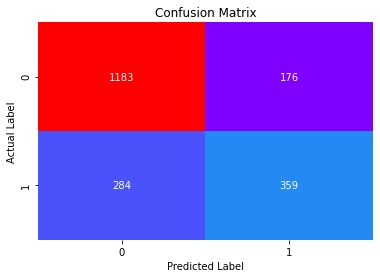

In [31]:
confusion_matrix(ntrain_labels,n_ytrain_predict)
sns.heatmap(confusion_matrix(ntrain_labels,n_ytrain_predict),annot=True, fmt='d',cbar=False,cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [120]:
nn_train_acc=nn_best_grid.score(nX_train,ntrain_labels) 
nn_train_acc

0.7702297702297702

In [33]:
print(classification_report(ntrain_labels,n_ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1359
           1       0.67      0.56      0.61       643

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [34]:
print(classification_report(ntrain_labels,n_ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1359
           1       0.67      0.56      0.61       643

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



In [121]:
nn_metrics=classification_report(ntrain_labels, n_ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.56
nn_train_f1  0.61


AUC: 0.814


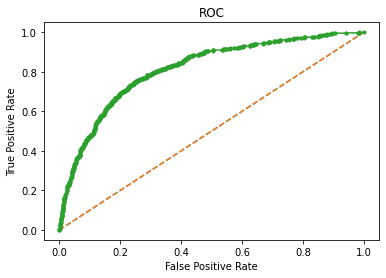

In [122]:
# predict probabilities
nnprobs = nn_best_grid.predict_proba(nX_train)
# keep probabilities for the positive outcome only
nnprobs = nnprobs[:, 1]
# calculate AUC
nn_train_auc = roc_auc_score(ntrain_labels, nnprobs)
print('AUC: %.3f' % nn_train_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ntrain_labels, nnprobs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [52]:
from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.814
Area under the ROC curve : 0.813746
0.29678770210617067


Text(0.5, 1.0, 'Receiver operating characteristic')

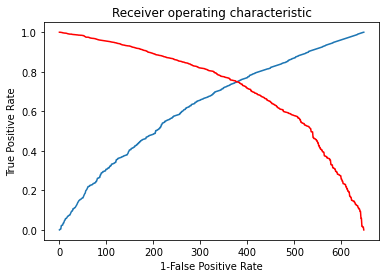

In [58]:
# predict probabilities
nnprobs = nn_best_grid.predict_proba(nX_train)
# keep probabilities for the positive outcome only
nnprobs = nnprobs[:, 1]
# calculate AUC
nn_train_auc = roc_auc_score(ntrain_labels, nnprobs)
print('AUC: %.3f' % nn_train_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ntrain_labels, nnprobs)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
# ax.set_xticklabels([])

In [37]:
# nn_train_fpr, nn_train_tpr,_=roc_curve(ntrain_labels,nn_best_grid.predict_proba(nX_train)[:,1])
# plt.plot(nn_train_fpr,nn_train_tpr,color='black')
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# nn_train_auc=roc_auc_score(ntrain_labels,nn_best_grid.predict_proba(nX_train)[:,1])
# print('Area under Curve is', nn_train_auc)

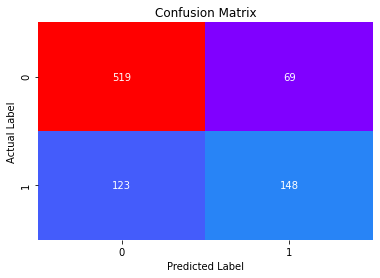

In [38]:
confusion_matrix(ntest_labels,n_ytest_predict)
sns.heatmap(confusion_matrix(ntest_labels,n_ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [123]:
nn_test_acc=nn_best_grid.score(nX_test,ntest_labels)
nn_test_acc

0.7764842840512224

In [40]:
print(classification_report(ntest_labels,n_ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       588
           1       0.68      0.55      0.61       271

    accuracy                           0.78       859
   macro avg       0.75      0.71      0.73       859
weighted avg       0.77      0.78      0.77       859



In [124]:
nn_metrics=classification_report(ntest_labels, n_ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.68
nn_test_recall  0.55
nn_test_f1  0.61


AUC: 0.822


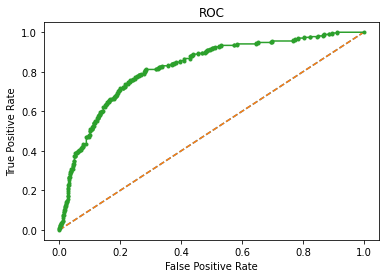

In [125]:
# predict probabilities
nnprobs = nn_best_grid.predict_proba(nX_test)
# keep probabilities for the positive outcome only
nnprobs = nnprobs[:, 1]
# calculate AUC
nn_test_auc = roc_auc_score(ntest_labels, nnprobs)
print('AUC: %.3f' % nn_test_auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ntest_labels, nnprobs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [43]:
# nn_test_fpr, nn_test_tpr,_=roc_curve(ntest_labels,nn_best_grid.predict_proba(nX_test)[:,1])
# plt.plot(nn_test_fpr,nn_test_tpr,color='black')
# plt.plot([0, 1], [0, 1], linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# nn_test_auc=roc_auc_score(ntest_labels,nn_best_grid.predict_proba(nX_test)[:,1])
# print('Area under Curve is', nn_test_auc)

# ANN Conclusion

<b>Train Data:</b><br>
AUC: 81%<br>
Accuracy: 77%<br>
Precision: 67%<br>
Recall: 56%<br>
f1-Score: 61%<br>

<b>Test Data:</b><br>
AUC: 82%<br>
Accuracy: 78%<br>
Precision: 68%<br>
Recall: 55%<br>
f1-Score: 61%

**Compare ROC curves and Calculate Area under the curve for all models**

In [126]:
models=[dt_model,rfcl,nncl]
models_names={dt_model:'DecisionTreeClassifier',rfcl:'RandomForestClassifier',nncl:'ANN'}

Area under the curve for Decision Tree Classification Model is 0.8015444185054095
Area under the curve for Random Forest Classification Model is 0.8221534001054297
Area under the curve for Artificial Neural Network Model is 0.8218866882546377


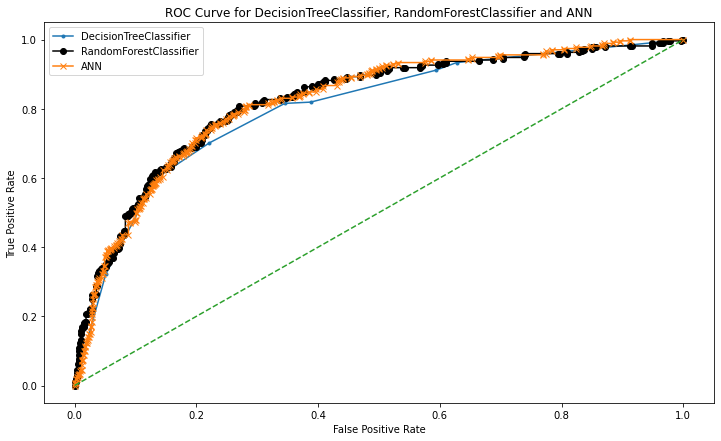

In [134]:
# models_names={dtc:'DecisionTreeClassifier',rfc:'RandomForestClassifier',mlp:'ANN'}

print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(ctest_labels,ct_best_grid.predict_proba(cX_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(ntest_labels,nn_best_grid.predict_proba(nX_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(ctest_labels,ct_best_grid.predict_proba(cX_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o',color='black') 

fpr_ann, tpr_ann, thresholds = roc_curve(ntest_labels,nn_best_grid.predict_proba(nX_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(models_names.values())
plt.show()



**Comparison of the performance metrics from the 3 models**

In [133]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'CART Test with Threshold >0.3':[cart_test_acc_threshold,cart_test_auc_threshold,cart_test_recall_threshold,cart_test_precision_threshold,cart_test_f1_threshold],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
        'Random Forest Test with Threshold >0.3':[rf_test_acc_threshold,rf_test_auc_threshold,rf_test_recall_threshold,rf_test_precision_threshold,rf_test_f1_threshold],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,CART Test with Threshold >0.3,Random Forest Train,Random Forest Test,Random Forest Test with Threshold >0.3,Neural Network Train,Neural Network Test
Accuracy,0.76,0.78,0.91,0.80,0.79,0.86,0.77,0.78
AUC,0.80,0.80,0.74,0.84,0.82,0.76,0.81,0.82
Recall,0.58,0.60,0.70,0.60,0.60,0.76,0.56,0.55
Precision,0.65,0.68,0.59,0.72,0.68,0.59,0.67,0.68
F1 Score,0.61,0.63,0.64,0.65,0.64,0.66,0.61,0.61
